# **Analisis Prediksi Harga Saham PT Telekomunikasi Indonesia Tbk (TLKM)**
- **Nama:** Andi Zahrina Athirah Ahmad
- **Email:** azahrinathiraha051@gmail.com
- **ID Dicoding:** azahrnath15

## **1. Business understanding**

### 🔹 Problem Statement
Investor dan perusahaan sering mengalami kesulitan dalam memperkirakan arah pergerakan harga saham TLKM setiap bulannya karena volatilitas pasar dan ketidakpastian kondisi ekonomi. Tanpa alat bantu prediksi yang akurat, keputusan investasi berisiko tinggi dan tidak berbasis data.

Untuk menjawab tantangan ini, perusahaan atau investor memerlukan sistem prediksi harga saham TLKM yang dapat mengidentifikasi pola historis dan menghasilkan proyeksi harga masa depan secara akurat.

  **Problem Questions**
  - Fitur historis apa yang paling berpengaruh terhadap harga saham TLKM pada bulan berikutnya?

  - Berapa estimasi harga saham TLKM pada bulan-bulan selanjutnya berdasarkan data historis?

  - Model prediksi mana yang paling akurat dalam memproyeksikan harga saham TLKM: LSTM, GRU, XGBoost, atau LightGBM?

  - Bagaimana hasil prediksi harga saham TLKM dapat digunakan untuk mendukung strategi investasi yang lebih efektif?

---

### 🔹 Goal
Proyek ini bertujuan untuk memberikan solusi prediktif yang dapat membantu investor dalam mengambil keputusan berbasis data terhadap saham PT Telekomunikasi Indonesia (TLKM). Adapun tujuan utama dari proyek ini adalah sebagai berikut:
  - Mengembangkan sistem prediksi harga saham TLKM berbasis data historis bulanan.

  - Membandingkan performa beberapa algoritma machine learning seperti LSTM, GRU, XGBoost, dan LightGBM menggunakan metrik evaluasi MAE dan RMSE.

  - Memberikan insight kepada investor mengenai tren harga saham untuk mendukung keputusan investasi jangka menengah hingga panjang.

  - Menyediakan visualisasi tren harga aktual vs prediksi sebagai pendukung interpretasi hasil model.

---

### 🔹 Solution Statement
Solusi yang diusulkan untuk menjawab permasalahan prediksi harga saham TLKM adalah membangun model prediktif berbasis time series menggunakan data historis harga saham bulanan, yang mencakup harga pembukaan, penutupan, tertinggi, terendah, dan volume transaksi.

Model akan dibangun dan dibandingkan menggunakan empat algoritma: LSTM, GRU, XGBoost, dan LightGBM.

Setiap model akan dievaluasi menggunakan metrik MAE (Mean Absolute Error) dan RMSE (Root Mean Square Error). Model dengan performa terbaik akan dipilih sebagai rekomendasi utama untuk memprediksi harga saham TLKM dan mendukung pengambilan keputusan investasi jangka menengah hingga panjang.




## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
import matplotlib.dates as mdates


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense
from tensorflow.keras.layers import Conv1D, Flatten

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam




### 📚 Library dan Fungsinya

* `pandas as pd` → Untuk membaca dan mengolah data dalam bentuk tabel (DataFrame).
* `numpy as np` → Untuk perhitungan numerik seperti array dan operasi matematika.
* `matplotlib.pyplot as plt` → Untuk membuat visualisasi data seperti grafik garis, batang, dll.
* `seaborn as sns` → Untuk visualisasi data statistik yang lebih menarik dan informatif.
* `io.StringIO` → Untuk membaca data berbasis teks (misalnya CSV) dari string.
* `requests` → Untuk mengambil data dari internet (misalnya file CSV dari URL).
* `matplotlib.dates as mdates` → Untuk mengatur tampilan format tanggal pada grafik sumbu waktu.

#### Scikit-Learn

* `sklearn.model_selection.train_test_split` → Untuk membagi dataset menjadi data latih dan data uji.
* `sklearn.preprocessing.MinMaxScaler` → Untuk menskalakan nilai data ke dalam rentang 0–1 agar model lebih stabil saat pelatihan.

#### TensorFlow / Keras

* `tensorflow.keras.models.Sequential` → Untuk membangun model neural network secara berurutan (layer demi layer).
* `tensorflow.keras.layers.LSTM` → Layer khusus untuk memproses data deret waktu (time series) dengan memori jangka panjang.
* `tensorflow.keras.layers.GRU` → Alternatif LSTM yang lebih ringan dan cepat untuk data time series.
* `tensorflow.keras.layers.Dense` → Layer fully connected yang digunakan untuk menghasilkan output dari model.


## **2. Data understanding**

Tahap ini bertujuan untuk memahami struktur dan karakteristik data historis saham yang akan digunakan dalam proses prediksi harga saham **PT Telekomunikasi Indonesia Tbk (TLKM)**. Dengan memahami isi dataset, kita dapat mengetahui pola data, potensi permasalahan seperti missing value atau outlier, serta hubungan antar variabel sebelum melanjutkan ke tahap preprocessing dan modeling.

---

### Sumber Dataset

Dataset yang digunakan diperoleh dari situs **Kaggle** melalui tautan berikut:  
🔗 [Dataset Saham Bursa Efek - Kaggle (oleh Agung Pambudi)](https://www.kaggle.com/datasets/agungpambudi/dataset-saham-bursa-efek/data)

**Nama File:** `TLKM.csv`

Dataset ini berisi data historis harga saham **TLKM** yang tercatat di Bursa Efek Indonesia (BEI), termasuk harga open, close, volume perdagangan, dan informasi relevan lainnya.



### **Data Loading**


Tahap **data loading** merupakan langkah awal dalam proses analisis data, di mana dataset dimuat ke dalam lingkungan kerja (Google Colab) agar dapat diproses dan dianalisis lebih lanjut.

Langkah-langkah utama dalam tahap ini meliputi:

* **Membaca file dataset:**
  Dataset yang digunakan adalah file `TLKM.csv`, yang berisi data historis harga saham PT Telekomunikasi Indonesia Tbk. File ini dibaca menggunakan library `pandas` melalui fungsi `pd.read_csv()`. Fungsi ini memungkinkan kita untuk memuat data dalam format CSV ke dalam bentuk **DataFrame**.

* **Menampilkan cuplikan data awal:**
  Setelah data dimuat, fungsi `head()` digunakan untuk menampilkan lima baris pertama dari dataset. Ini bertujuan untuk memverifikasi bahwa data telah berhasil dimuat dengan benar serta memberikan gambaran awal tentang struktur dan isi dataset.

Tahap ini sangat krusial karena memastikan bahwa data tersedia dan terbaca dengan baik sebelum melanjutkan ke tahap eksplorasi, pembersihan, dan pemodelan. Kesalahan dalam pemuatan data dapat memengaruhi keseluruhan proses analisis.


In [ ]:
# Mengambil dataset CSV TLKM dari GitHub (raw URL)
url = 'https://raw.githubusercontent.com/2209106126-azahrinathirah/Submission-Coding-Camp/main/Machine%20Learning%20Terapan/Proyek%20Pertama/Dataset/TLKM.csv'
response = requests.get(url)
raw_text = response.text

# Membaca dataset
TLKM = pd.read_csv(url)

# Menampilkan 5 dataset (5 baris pertama dan 5 baris terakhir)
TLKM


,Date,Adj Close,Close,High,Low,Open,Volume
0,07/11/2019,3216.63,4070.0,4150.0,3990.0,4150.0,125.291.200
1,08/11/2019,3248.24,4110.0,4120.0,3990.0,4010.0,70.404.800
2,11/11/2019,3240.34,4100.0,4120.0,4040.0,4040.0,57.079.800
3,12/11/2019,3303.57,4180.0,4190.0,4050.0,4050.0,88.251.100
4,13/11/2019,3279.86,4150.0,4170.0,4100.0,4130.0,91.925.700
...,...,...,...,...,...,...,...
1207,31/10/2024,2820.00,2820.0,2870.0,2820.0,2860.0,139.590.300
1208,01/11/2024,2780.00,2780.0,2840.0,2760.0,2820.0,99.364.500
1209,04/11/2024,2800.00,2800.0,2810.0,2750.0,2780.0,63.112.300
1210,05/11/2024,2770.00,2770.0,2810.0,2730.0,2800.0,96.721.100


**Insight**

Dataset berisi **1.212 baris data** (records) atau jumlah pengamatan yang merepresentasikan pergerakan harga saham harian **PT Telekomunikasi Indonesia Tbk** selama periode tertentu.

Terdapat **7 kolom fitur** pada dataset ini, yaitu:

- **Date**: Tanggal transaksi
- **Adj Close**: Harga penutupan yang telah disesuaikan dengan dividen, stock split, dll
- **Close**: Harga penutupan saham pada akhir sesi perdagangan
- **High**: Harga tertinggi saham dalam satu hari perdagangan
- **Low**: Harga terendah saham dalam satu hari perdagangan
- **Open**: Harga pembukaan saham pada awal sesi perdagangan
- **Volume**: Jumlah saham yang diperdagangkan pada hari tersebut

Informasi ini memberikan gambaran awal mengenai struktur data yang akan digunakan untuk analisis dan pemodelan lebih lanjut, khususnya dalam konteks **time series forecasting** harga saham.


### **Exploratory Data Analysis - Deskripsi Variabel**


Tahapan ini bertujuan untuk memahami struktur dan karakteristik setiap kolom dalam dataset, termasuk tipe data dan statistik deskriptif dari fitur numerik.

In [ ]:
# INFO DATASET
print("Struktur Dataset:\n")
TLKM.info()

Struktur Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1212 non-null   object 
 1   Adj Close  1212 non-null   float64
 2   Close      1212 non-null   float64
 3   High       1212 non-null   float64
 4   Low        1212 non-null   float64
 5   Open       1212 non-null   float64
 6   Volume     1212 non-null   object 
dtypes: float64(5), object(2)
memory usage: 66.4+ KB


**Insight**

Dataset terdiri atas **1.212 baris** dan **7 kolom**.

- **Lima kolom bertipe numerik** (`float64`):  
  `Adj Close`, `Close`, `High`, `Low`, dan `Open`.

- **Dua kolom bertipe objek** (`object`):  
  `Date` dan `Volume`.  

In [ ]:
# Tampilkan statistik deskriptif
print("📊 Statistik Deskriptif:")
print(TLKM.describe())

📊 Statistik Deskriptif:
         Adj Close        Close         High          Low         Open
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000
mean   3232.919909  3647.978548  3690.998350  3607.483498  3650.981848
std     506.366462   510.865708   508.614228   508.024318   508.843617
min    2070.660000  2560.000000  2590.000000  2450.000000  2550.000000
25%    2835.450000  3190.000000  3250.000000  3150.000000  3200.000000
50%    3228.050000  3720.000000  3765.000000  3690.000000  3720.000000
75%    3666.010000  4030.000000  4060.000000  3990.000000  4030.000000
max    4295.700000  4770.000000  4850.000000  4720.000000  4850.000000


**Insight**

- Rata-rata harga saham:
  - `Close` dan `Adj Close` berada di kisaran **3.200 – 3.600**.
  
- Nilai ekstrim:
  - Harga tertinggi (`High`) mencapai **4.850**.
  - Harga terendah (`Low`) berada di sekitar **2.450**.

- Penyebaran data cukup lebar:
  - Ditunjukkan oleh nilai **standar deviasi** sekitar **500** untuk seluruh fitur numerik.

- Distribusi nilai:
  - Median (50%) dan kuartil (25% dan 75%) menunjukkan distribusi data yang relatif **seimbang**, tanpa indikasi adanya skew yang ekstrem.

### **Exploratory Data Analysis - Menangani Missing Value**


Tahapan ini bertujuan untuk memeriksa apakah terdapat **nilai yang hilang (missing values)** dalam dataset.

Nilai hilang dapat menyebabkan gangguan dalam proses analisis dan pemodelan, sehingga perlu diidentifikasi dan ditangani terlebih dahulu. Pemeriksaan dilakukan terhadap seluruh kolom dalam dataset menggunakan fungsi seperti `isnull().sum()`.

Jika terdapat nilai yang hilang, langkah selanjutnya bisa berupa:
- Menghapus baris atau kolom terkait
- Mengisi nilai yang hilang (imputasi) dengan nilai tertentu seperti mean, median, atau metode lain

In [ ]:
# Hitung missing value
missing_values = TLKM.isnull().sum().reset_index()
missing_values.columns = ['Kolom', 'Jumlah Nilai Hilang']

# Tampilkan sebagai tabel
missing_values.style.set_table_attributes('style="display:inline"').set_caption(" Jumlah Nilai Hilang pada Dataset TLKM")

,Kolom,Jumlah Nilai Hilang
0,Date,0
1,Adj Close,0
2,Close,0
3,High,0
4,Low,0
5,Open,0
6,Volume,0


**Insight**

- Hasil pemeriksaan menunjukkan bahwa **tidak terdapat nilai yang hilang** pada seluruh kolom dalam dataset.
- Dengan tidak adanya missing value, proses analisis dapat langsung dilanjutkan ke tahapan berikutnya tanpa perlu melakukan penanganan khusus terhadap data yang tidak lengkap.


### **Konversi Tipe Data Kolom Tanggal dan Volume**

Agar data dapat dianalisis dengan benar, diperlukan penyesuaian tipe data pada beberapa kolom:

- **Kolom `Date`** awalnya bertipe `object` dan perlu dikonversi menjadi `datetime64` agar dapat digunakan dalam analisis deret waktu (time series).
- **Kolom `Volume`** juga awalnya bertipe `object`, padahal berisi angka. Oleh karena itu perlu dikonversi menjadi `float64`  agar dapat digunakan dalam analisis numerik dan visualisasi.

Langkah ini sangat penting untuk memastikan bahwa setiap kolom memiliki tipe data yang sesuai dengan karakteristik dan tujuan analisisnya.

In [ ]:
# Hapus titik ribuan di kolom Volume secara manual (kolom ke-7)
clean_text = '\n'.join([
    ','.join([
        col if i != 6 else col.replace('.', '')
        for i, col in enumerate(row.split(','))
    ])
    for row in raw_text.strip().split('\n')
])

# Baca ulang ke dalam DataFrame
TLKM = pd.read_csv(StringIO(clean_text))

# Konversi kolom Date ke datetime
TLKM['Date'] = pd.to_datetime(TLKM['Date'], format='%d/%m/%Y', errors='coerce')

# Urutkan berdasarkan kolom Date
TLKM = TLKM.sort_values(by='Date').reset_index(drop=True)

# Konversi Volume ke float
TLKM['Volume'] = TLKM['Volume'].astype(float)

# Cek hasil
print("TIPE DATASET:")
print(TLKM.dtypes)

TLKM.head()


TIPE DATASET:
Date         datetime64[ns]
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object


,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-11-07,3216.63,4070.0,4150.0,3990.0,4150.0,125291200.0
1,2019-11-08,3248.24,4110.0,4120.0,3990.0,4010.0,70404800.0
2,2019-11-11,3240.34,4100.0,4120.0,4040.0,4040.0,57079800.0
3,2019-11-12,3303.57,4180.0,4190.0,4050.0,4050.0,88251100.0
4,2019-11-13,3279.86,4150.0,4170.0,4100.0,4130.0,91925700.0


**Insight**

- Hasil konversi menunjukkan bahwa tipe data pada kolom `Date` dan `Volume` telah berhasil disesuaikan.

- Dengan tipe data yang sudah sesuai, analisis lanjutan seperti plotting time series dan perhitungan statistik volume dapat dilakukan secara optimal.

### **Exploratory Data Analysis - Menangani Outliers**


Deteksi outlier dilakukan menggunakan **metode IQR (Interquartile Range)**, yang umum digunakan dalam analisis data eksploratif.

Tujuannya adalah untuk mengidentifikasi nilai-nilai yang berada jauh di luar distribusi normal data, agar dapat dipertimbangkan dalam tahap pembersihan atau pemodelan.

#### **Deteksi Outlier**

In [ ]:
# Ambil hanya kolom numerik
TLKM_numerik = TLKM.select_dtypes(include='number')

# Hitung Q1, Q3, dan IQR
Q1 = TLKM_numerik.quantile(0.25)
Q3 = TLKM_numerik.quantile(0.75)
IQR = Q3 - Q1

# Buat mask untuk deteksi outlier
outliers = ((TLKM_numerik < (Q1 - 1.5 * IQR)) | (TLKM_numerik > (Q3 + 1.5 * IQR)))

# Tampilkan jumlah outlier per kolom
print("Jumlah Outlier per Kolom:")
print(outliers.sum())

Jumlah Outlier per Kolom:
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume       64
dtype: int64


**Insight**
- Hasil deteksi menunjukkan bahwa sebagian besar kolom numerik **tidak mengandung outlier**, kecuali pada kolom `Volume`.
- Kolom `Volume` memiliki **64 outlier**
- Outlier ini tidak langsung dihapus, melainkan perlu dianalisis konteksnya sebelum menentukan langkah penanganan lebih lanjut.


#### Outlier pada Volume - Box Plot

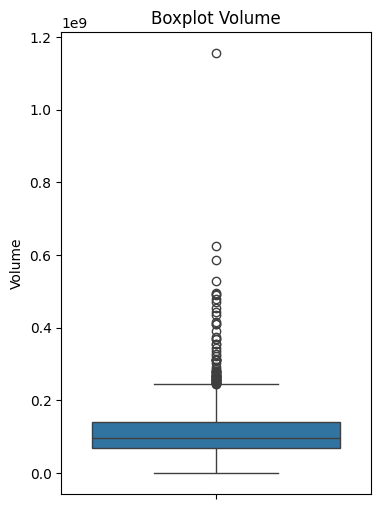

In [ ]:
# Volume
plt.figure(figsize=(4, 6))
sns.boxplot(y=TLKM['Volume'])
plt.title("Boxplot Volume")
plt.ylabel("Volume")
plt.show()

**Insight**

Boxplot pada fitur `Volume` menunjukkan bahwa:

- Terdapat **banyak outlier** yang terletak jauh di atas nilai maksimum interquartile range (IQR), bahkan mencapai lebih dari **1 miliar transaksi**.
- Mayoritas data `Volume` berada di bawah **200 juta**, namun ada beberapa titik ekstrem yang jauh lebih tinggi.
- Outlier ini ditandai dengan **titik-titik individual di atas whisker**, mengindikasikan **fluktuasi besar** dalam aktivitas perdagangan pada hari-hari tertentu.

Insight ini menguatkan hasil deteksi IQR sebelumnya bahwa **kolom `Volume` mengandung outlier yang cukup signifikan**, yang kemungkinan disebabkan oleh lonjakan aktivitas pasar.

#### **Visualisasi Deteksi Outlier -Scatter Plot**

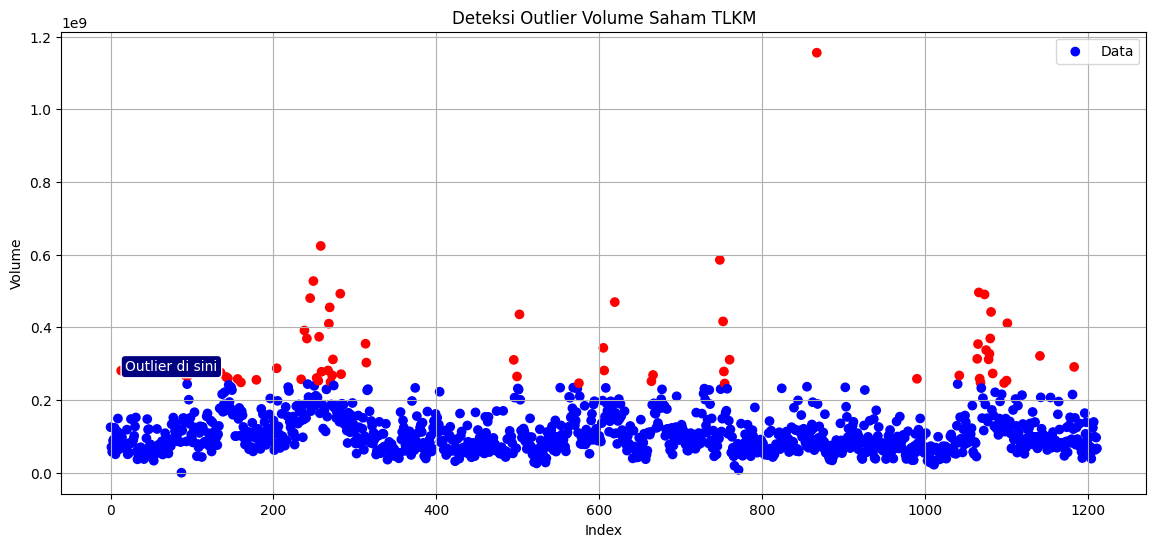

In [ ]:
# --- Deteksi Outlier Volume ---
Q1 = TLKM['Volume'].quantile(0.25)
Q3 = TLKM['Volume'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

TLKM['Outlier'] = (TLKM['Volume'] < batas_bawah) | (TLKM['Volume'] > batas_atas)

# --- Visualisasi ---
plt.figure(figsize=(14, 6))
plt.scatter(TLKM.index, TLKM['Volume'], c=TLKM['Outlier'].map({True: 'red', False: 'blue'}), label='Data')
plt.xlabel("Index")
plt.ylabel("Volume")
plt.title("Deteksi Outlier Volume Saham TLKM")

# Anotasi untuk outlier pertama (contoh satu saja)
outliers = TLKM[TLKM['Outlier']]
if not outliers.empty:
    outlier_index = outliers.index[0]
    outlier_value = outliers.loc[outlier_index, 'Volume']
    plt.annotate("Outlier di sini", xy=(outlier_index, outlier_value),
                 xytext=(outlier_index+5, outlier_value+1000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="navy", ec="white", lw=1),
                 color='white')

plt.legend()
plt.grid(True)
plt.show()

**Insight**

Grafik scatter di atas menunjukkan distribusi volume perdagangan harian saham TLKM, dengan:

- 🔵 Titik biru mewakili data volume yang berada dalam rentang normal.
- 🔴 Titik merah mewakili **outlier** yang terdeteksi menggunakan **metode IQR**.

**Pola yang terlihat:**
- Outlier volume tidak terkonsentrasi di satu waktu tertentu, tetapi muncul **sporadis** di berbagai titik sepanjang data.
- Ada **lonjakan ekstrem** volume (di atas 1 miliar) yang menjadi indikasi **aktivitas pasar tidak biasa** — ini terlihat mencolok di sekitar indeks ke-800.


#### **Penangananan Outlier Volume**

**Metode Penanganan**:
- Outlier pada kolom `Volume` ditangani menggunakan **transformasi logaritmik `log1p()`**, yaitu `log(1 + x)`. Transformasi ini diterapkan agar distribusi data menjadi lebih seimbang dan tidak terdistorsi oleh nilai-nilai ekstrem.

---

**Penjelasan Transformasi**:
- Transformasi `log1p()` bekerja dengan mengubah skala nilai menjadi lebih kecil secara proporsional.
- Nilai-nilai besar dikompresi, sehingga lebih dekat dengan rentang nilai mayoritas.  
- Sebagai hasilnya, sebaran data menjadi lebih simetris dan stabil untuk analisis statistik maupun pemodelan machine learning.

---
**Alasan Pemilihan Transformasi logaritmik**

- **Mengurangi skewness:**  
  Distribusi volume yang awalnya sangat menceng ke kanan menjadi lebih simetris. Ini penting agar model statistik atau machine learning tidak bias terhadap nilai besar.

- **Mengurangi pengaruh outlier:**  
  Nilai ekstrem dikompresi, sehingga tidak mendominasi perhitungan rata-rata, deviasi standar, atau memengaruhi performa model prediksi.

- **Aman untuk data nol:**  
  Berbeda dengan `log(x)` yang tidak bisa menerima nilai nol, `log1p(x)` (log(1 + x)) tetap valid ketika `x = 0`. Ini menjaga proses transformasi tetap aman dan bebas error.

- **Tidak menghapus data:**  
  Semua data tetap digunakan. Transformasi hanya mengubah skala tanpa membuang baris atau merusak struktur dataset.

- **Cocok untuk data time series:**  
  Dalam time series, kestabilan skala sangat penting agar model seperti LSTM/GRU dapat belajar pola historis dengan baik. Transformasi log membantu menjaga tren dan fluktuasi tetap proporsional tanpa distorsi dari lonjakan ekstrem.


#### **Visualisasi Outlier Setelah Transformasi**

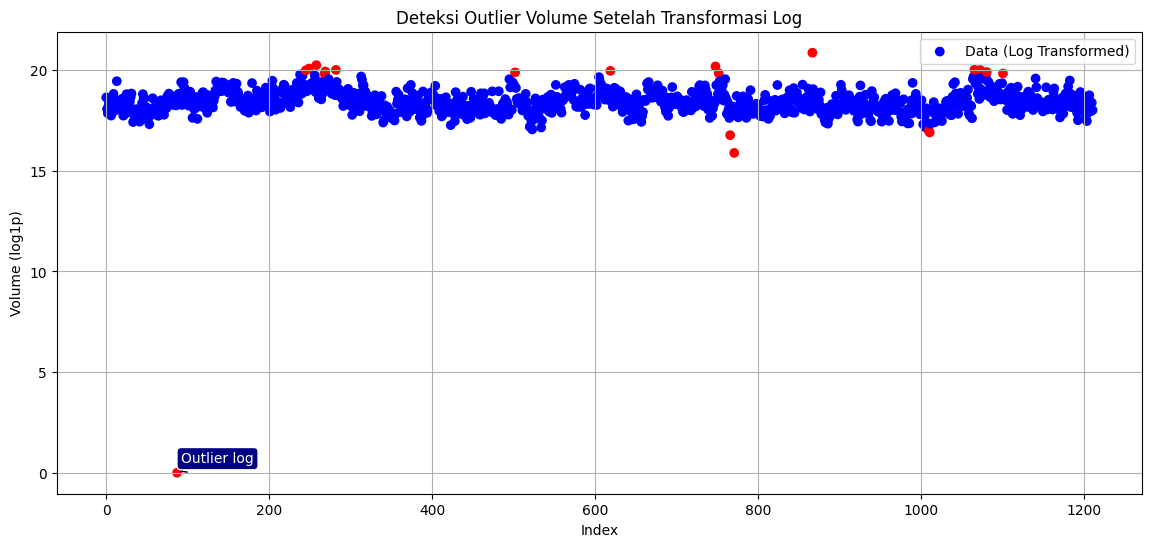

In [ ]:
# 2. Simpan hasil di df_clean (salinan dari TLKM)
df_clean = TLKM.copy()

# --- Deteksi Outlier Setelah Transformasi Log ---
Q1_log = df_clean['Volume_log'].quantile(0.25)
Q3_log = df_clean['Volume_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log
batas_bawah_log = Q1_log - 1.5 * IQR_log
batas_atas_log = Q3_log + 1.5 * IQR_log

df_clean['Outlier_log'] = (df_clean['Volume_log'] < batas_bawah_log) | (df_clean['Volume_log'] > batas_atas_log)

# --- Visualisasi ---
plt.figure(figsize=(14, 6))
plt.scatter(
    df_clean.index,
    df_clean['Volume_log'],
    c=df_clean['Outlier_log'].map({True: 'red', False: 'blue'}),
    label='Data (Log Transformed)'
)
plt.xlabel("Index")
plt.ylabel("Volume (log1p)")
plt.title("Deteksi Outlier Volume Setelah Transformasi Log")

# Anotasi (contoh satu outlier saja)
outliers_log = df_clean[df_clean['Outlier_log']]
if not outliers_log.empty:
    outlier_index = outliers_log.index[0]
    outlier_value = outliers_log.loc[outlier_index, 'Volume_log']
    plt.annotate("Outlier log", xy=(outlier_index, outlier_value),
                 xytext=(outlier_index+5, outlier_value+0.5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="navy", ec="white", lw=1),
                 color='white')

plt.legend()
plt.grid(True)
plt.show()


**Insight**

Visualisasi menunjukkan bahwa setelah dilakukan transformasi logaritmik (`log1p`) pada kolom `Volume`, penyebaran data menjadi lebih **terpusat dan seragam**.

**Observasi**:
- Sebagian besar data `Volume_log` berada dalam rentang **17 hingga 19**, menunjukkan skala yang konsisten dan stabil.
- Outlier (ditandai warna merah) menjadi **jauh lebih sedikit dan lebih jelas terlihat** dibanding sebelum transformasi.
- Terdapat beberapa titik dengan nilai log > 20 yang merupakan **outlier nyata**.
- Satu titik mendekati nol muncul karena nilai volume aslinya adalah nol — **bukan outlier secara statistik**, namun tetap penting sebagai hari tanpa transaksi.

**Kesimpulan**:
- Transformasi log `log1p` efektif dalam **menekan pengaruh nilai ekstrem**, tanpa menghapus data.
- Deteksi outlier menjadi lebih **presisi**, memudahkan analisis lanjutan.
- Skala yang stabil membuat dataset lebih **siap untuk pemodelan time series**, seperti LSTM dan GRU

#### Outlier pada Harga Close Berdasarkan Waktu

Untuk mendeteksi outlier pada harga penutupan (Close), digunakan metode IQR (Interquartile Range). Deteksi dilakukan secara bulanan (berdasarkan kombinasi Tahun dan Bulan).

**Penanganan Outlier dengan Metode Capping**
- Setelah outlier terdeteksi, dilakukan penanganan dengan metode capping, yaitu membatasi nilai-nilai ekstrem dengan mengganti nilai-nilai di luar batas bawah dan atas menjadi batas tersebut. Capping dilakukan per kombinasi Tahun dan Bulan

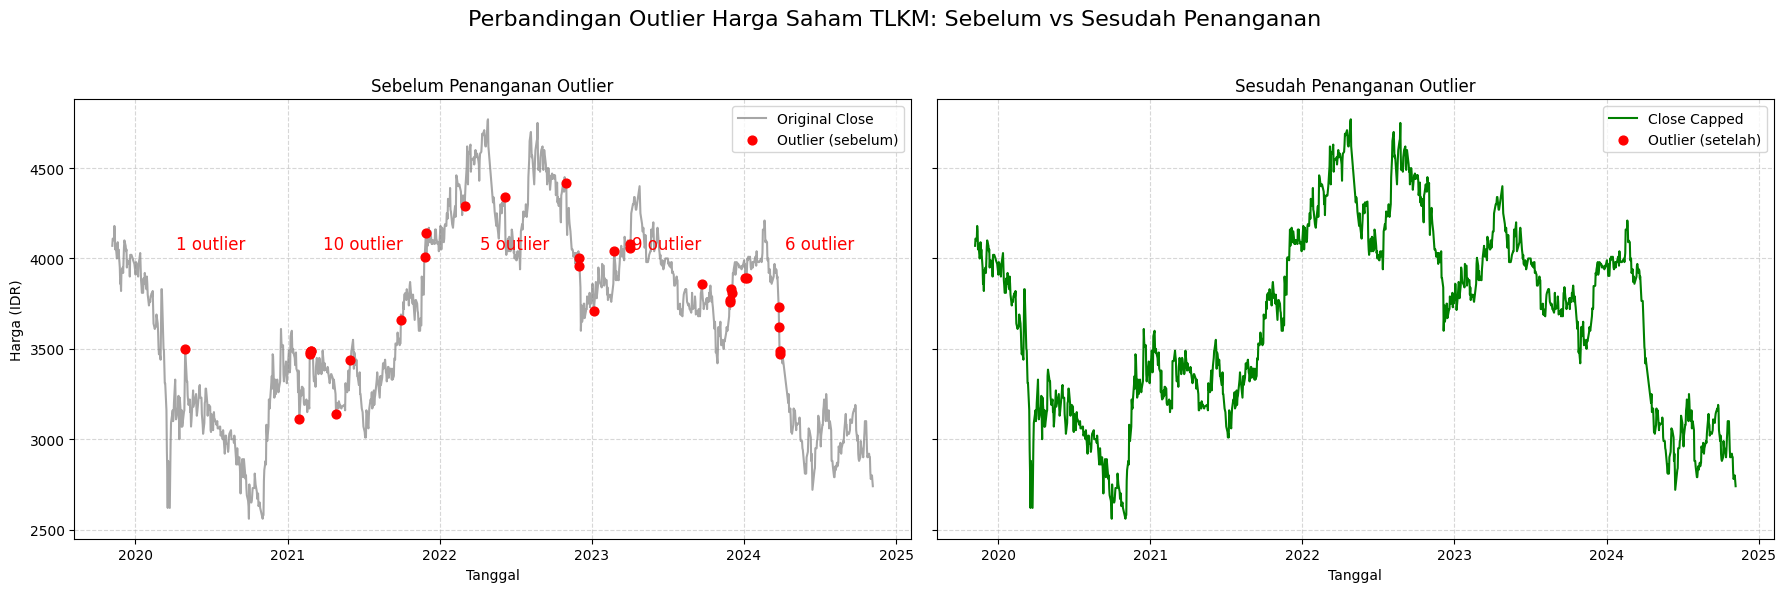

In [ ]:
# Pastikan kolom Date datetime dan buat Year & Month integer
TLKM['Date'] = pd.to_datetime(TLKM['Date'])
TLKM['Year'] = TLKM['Date'].dt.year
TLKM['Month'] = TLKM['Date'].dt.month


# 1. Tandai Outlier berdasarkan IQR per Tahun-Bulan
TLKM['Is_Outlier_Close'] = False
for (tahun, bulan), group in TLKM.groupby(['Year', 'Month']):
    Q1 = group['Close'].quantile(0.25)
    Q3 = group['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (
        (TLKM['Year'] == tahun) &
        (TLKM['Month'] == bulan) &
        ((TLKM['Close'] < lower_bound) | (TLKM['Close'] > upper_bound))
    )
    TLKM.loc[mask, 'Is_Outlier_Close'] = True

# 2. Buat Close_Capped (hasil capping per Tahun-Bulan)
TLKM['Close_Capped'] = TLKM['Close'].copy()
for (tahun, bulan), group in TLKM.groupby(['Year', 'Month']):
    Q1 = group['Close'].quantile(0.25)
    Q3 = group['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (TLKM['Year'] == tahun) & (TLKM['Month'] == bulan)
    TLKM.loc[mask, 'Close_Capped'] = TLKM.loc[mask, 'Close'].clip(lower_bound, upper_bound)

# 3. Tandai Outlier pada Close_Capped (seharusnya sudah sedikit atau nol)
TLKM['Is_Outlier_Capped'] = False
for (tahun, bulan), group in TLKM.groupby(['Year', 'Month']):
    Q1 = group['Close_Capped'].quantile(0.25)
    Q3 = group['Close_Capped'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (
        (TLKM['Year'] == tahun) &
        (TLKM['Month'] == bulan) &
        ((TLKM['Close_Capped'] < lower_bound) | (TLKM['Close_Capped'] > upper_bound))
    )
    TLKM.loc[mask, 'Is_Outlier_Capped'] = True

# 4. Visualisasi Sebelum vs Sesudah dengan teks jumlah outlier per tahun
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Grafik Sebelum Penanganan
axes[0].plot(TLKM['Date'], TLKM['Close'], label='Original Close', color='gray', alpha=0.7)
axes[0].scatter(
    TLKM.loc[TLKM['Is_Outlier_Close'], 'Date'],
    TLKM.loc[TLKM['Is_Outlier_Close'], 'Close'],
    color='red', label='Outlier (sebelum)', s=40, zorder=5
)
axes[0].set_title('Sebelum Penanganan Outlier')
axes[0].set_xlabel('Tanggal')
axes[0].set_ylabel('Harga (IDR)')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Tambahkan teks jumlah outlier per tahun di grafik sebelah kiri
outlier_per_year = TLKM[TLKM['Is_Outlier_Close']].groupby('Year').size()
for tahun, jumlah in outlier_per_year.items():
    x_pos = pd.Timestamp(f'{tahun}-07-01')
    y_pos = TLKM['Close'].max() * 0.85
    axes[0].text(x_pos, y_pos, f'{jumlah} outlier', color='red', fontsize=12, ha='center')

# Grafik Sesudah Penanganan
axes[1].plot(TLKM['Date'], TLKM['Close_Capped'], label='Close Capped', color='green')
axes[1].scatter(
    TLKM.loc[TLKM['Is_Outlier_Capped'], 'Date'],
    TLKM.loc[TLKM['Is_Outlier_Capped'], 'Close_Capped'],
    color='red', label='Outlier (setelah)', s=40, zorder=5
)
axes[1].set_title('Sesudah Penanganan Outlier')
axes[1].set_xlabel('Tanggal')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Perbandingan Outlier Harga Saham TLKM: Sebelum vs Sesudah Penanganan', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Penjelasan grafik:**

  - Garis abu abu: nilai Close sebelum penanganan, tampak banyak titik merah (outlier).
  - Garis Hijau: nilai Close_Capped setelah penanganan, lebih halus dan stabil.

**Insight**
- Outlier terdeteksi di banyak titik antara tahun 2020 hingga 2024.
- Paling banyak terjadi pada tahun 2021 dan 2023.
- Setelah penanganan, grafik menunjukkan tren yang lebih realistis dan bebas gangguan titik ekstrem.
Ini membuat data lebih akurat untuk analisis lanjutan dan pemodelan machine learning.

In [ ]:
# Setelah semua penanganan outlier dan visualisasi selesai
df_final = TLKM[['Date', 'Open', 'High', 'Low', 'Close_Capped']].copy()
df_final.rename(columns={'Close_Capped': 'Close'}, inplace=True)


In [ ]:
# Hitung jumlah outlier per kombinasi Tahun-Bulan
outlier_summary = (
    TLKM[TLKM['Is_Outlier_Close']]
    .groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Jumlah Outlier')
    .sort_values(by=['Year', 'Month'])
)

# Tampilkan hasilnya
print(outlier_summary)


    Year  Month  Jumlah Outlier
0   2020      4               1
1   2021      1               1
2   2021      2               4
3   2021      4               1
4   2021      5               1
5   2021     10               1
6   2021     11               2
7   2022      3               1
8   2022      6               1
9   2022     11               1
10  2022     12               2
11  2023      1               1
12  2023      2               1
13  2023      4               2
14  2023      9               1
15  2023     11               2
16  2023     12               2
17  2024      1               2
18  2024      3               4


In [ ]:
print("Jumlah Outlier Sebelum Penanganan:", TLKM['Is_Outlier_Close'].sum())
print("Jumlah Outlier Sesudah Penanganan:", TLKM['Is_Outlier_Capped'].sum())

Jumlah Outlier Sebelum Penanganan: 31
Jumlah Outlier Sesudah Penanganan: 0


#### **Eksplorasi Distribusi Waktu (Date)**

Pada tahap ini, dilakukan eksplorasi terhadap distribusi data berdasarkan waktu dengan fokus pada:

- **Jumlah data per tahun** untuk memastikan cakupan historis dataset.
- **Jumlah data per bulan** guna mendeteksi pola musiman atau potensi ketidakteraturan dalam distribusi waktu.

Tahap ini bertujuan mengevaluasi sebaran data berdasarkan fitur waktu (`Date`). Fokus analisis diarahkan untuk:

- Menilai apakah data tersebar **merata setiap tahun dan bulan**, tanpa ketimpangan signifikan.
- Memastikan tidak terdapat **gap besar atau periode yang hilang**, yang dapat menyebabkan bias dalam analisis.

Dengan memastikan distribusi waktu yang konsisten dan lengkap, kita dapat meningkatkan keandalan dalam analisis tren, pola musiman, dan prediksi berbasis waktu.

In [ ]:
# Jumlah data per tahun
jumlah_per_tahun = TLKM['Date'].dt.year.value_counts().sort_index()
print("Jumlah Data per Tahun:")
print(jumlah_per_tahun)
print(f"Total tahun unik: {jumlah_per_tahun.shape[0]}")
print(f"Total data: {jumlah_per_tahun.sum()} baris\n")

# Jumlah data per bulan
jumlah_per_bulan = TLKM['Date'].dt.month.value_counts().sort_index()
print("Jumlah Data per Bulan:")
print(jumlah_per_bulan)
print(f"Total bulan unik: {jumlah_per_bulan.shape[0]}")
print(f"Rata-rata data per bulan: {jumlah_per_bulan.mean():.2f} baris")

Jumlah Data per Tahun:
Date
2019     36
2020    242
2021    247
2022    246
2023    239
2024    202
Name: count, dtype: int64
Total tahun unik: 6
Total data: 1212 baris

Jumlah Data per Bulan:
Date
1     106
2      95
3     104
4      91
5      87
6      98
7     107
8     104
9     106
10    105
11    108
12    101
Name: count, dtype: int64
Total bulan unik: 12
Rata-rata data per bulan: 101.00 baris


**Insight**
- Distribusi Pertahun:
  - Jumlah data per tahun tergolong stabil dan konsisten, mengikuti kalender perdagangan bursa (sekitar 240–250 hari kerja per tahun).

  - Data tahun 2019 tidak mencakup satu tahun penuh, karena data dimulai di akhir tahun tersebut.

  - Data tahun 2024 hanya tersedia hingga akhir tahun dan belum mencakup 2025, sesuai dengan waktu saat ini (2025).

- Distribusi Perbulan:
  - Distribusi jumlah data per bulan sangat stabil, tanpa lonjakan ekstrem atau kekurangan signifikan.

  - Fluktuasi antar bulan mencerminkan kalender kerja bursa efek Indonesia, termasuk pengaruh hari libur nasional dan cuti bersama.


##### **Visualisasi Distribusi Data Pertanggal**

Pada tahap ini dilakukan visualisasi untuk memeriksa kestabilan jumlah data pada setiap tanggal transaksi. Tujuannya adalah untuk memastikan bahwa:

- Tidak terjadi duplikasi entri pada tanggal yang sama.
- Tidak terdapat tanggal kosong (missing date) yang dapat mengganggu analisis deret waktu.
- Dataset memiliki keteraturan temporal yang sesuai dengan frekuensi harian.

Tahapan ini penting untuk validasi awal dalam pemodelan time series, karena kestabilan waktu sangat berpengaruh terhadap performa model prediktif.

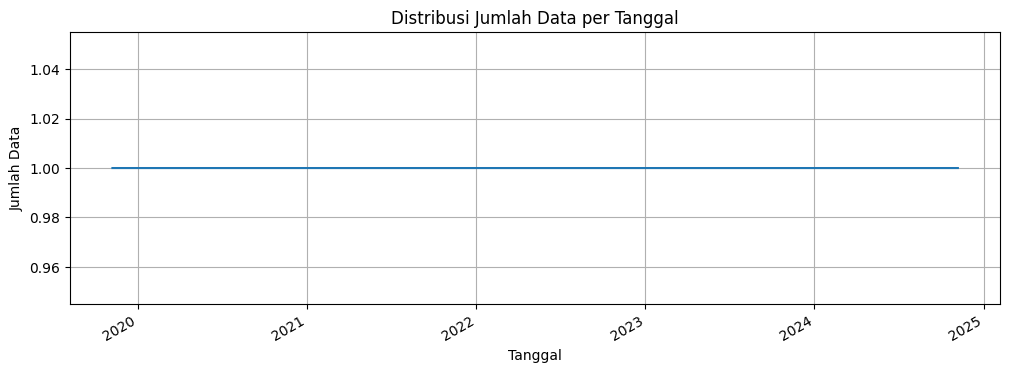

In [ ]:
plt.figure(figsize=(12, 4))
TLKM['Date'].value_counts().sort_index().plot()
plt.title('Distribusi Jumlah Data per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.show()


**Insight:**
- Tidak ada outlier tanggal
  - Setiap tanggal hanya muncul sekali, artinya tidak terdapat duplikasi tanggal dalam data.

- Data terdistribusi merata
  - Jumlah data per tanggal konsisten (1 per hari), tidak ada lonjakan jumlah atau tanggal yang hilang.

- Tidak ada anomali waktu
  - Tidak ditemukan gap atau periode kosong, sehingga data waktu lengkap dan kontinu untuk time series.



##### **Pemeriksaan Nilai Hilang pada Kolom `Date`**

Pada tahap ini, dilakukan pemeriksaan terhadap kolom `Date` untuk mengetahui apakah terdapat nilai yang hilang (`NaT` – Not a Time) setelah dikonversi ke format waktu (`datetime64`).

Langkah ini penting karena:

- Analisis deret waktu (time series) memerlukan data waktu yang **lengkap dan kontinu**.
- Kehilangan nilai tanggal dapat mengganggu proses seperti **resampling, agregasi, dan pelatihan model time series**.


In [ ]:
print("Jumlah NaT di kolom Date:", TLKM['Date'].isna().sum())

Jumlah NaT di kolom Date: 0


**Insight**:

- Tidak ditemukan nilai yang hilang (`NaT`) pada kolom `Date`.
- Seluruh baris dalam dataset memiliki cap waktu yang valid dan terformat dengan benar.
- Struktur waktu dataset sudah lengkap dan kontinu, tanpa perlu imputasi atau penghapusan data.
- Kondisi ini sangat ideal untuk analisis dan pemodelan time series seperti LSTM, GRU atau model forecasting lainnya, yang membutuhkan urutan waktu yang utuh.

### **Exploratory Data Analysis - Univariate Analysis**


**Univariate Analysis** adalah proses analisis eksploratif terhadap satu variabel dalam dataset. Analisis ini dilakukan untuk memahami karakteristik dasar dari masing-masing fitur, seperti distribusi nilai, pola, serta potensi outlier.

Tahapan ini penting karena:
- Memberikan pemahaman awal tentang bentuk sebaran data.
- Membantu mengidentifikasi apakah data terdistribusi normal, bimodal, atau skewed.
- Menentukan perlakuan selanjutnya terhadap data, seperti normalisasi, transformasi log, atau penanganan outlier.

Visualisasi yang digunakan pada tahap ini adalah:
- **Histogram**: Menampilkan frekuensi (jumlah) nilai dalam rentang tertentu.
- **KDE (Kernel Density Estimation)**: Kurva halus untuk memperkirakan bentuk distribusi data secara kontinu.


#### **Visualisasi Histogram dan KDE**

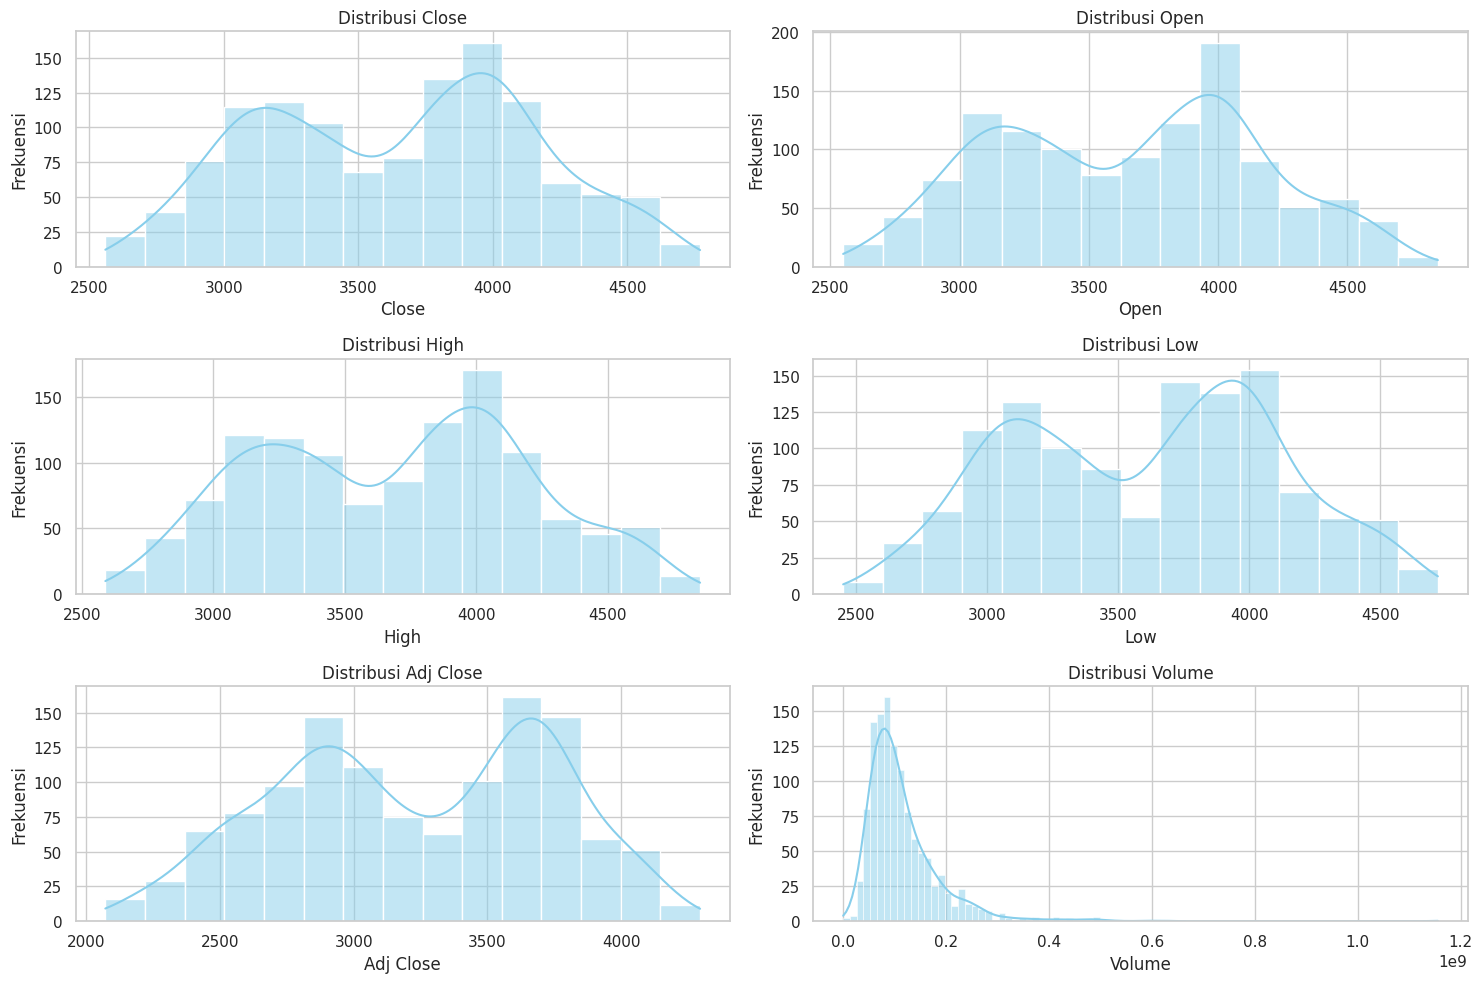

In [ ]:
# Set tema visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Daftar kolom numerik yang akan dianalisis
numeric_cols = ['Close', 'Open', 'High', 'Low', 'Adj Close', 'Volume']

# Buat subplot untuk masing-masing kolom
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(TLKM[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Insight**

1. **Close, Open, High, Low, Adj Close**
   - Memiliki pola distribusi **bimodal** (dua puncak).
   - Hal ini menunjukkan kemungkinan adanya dua kelompok harga yang dominan selama periode data.
   - Kemungkinan disebabkan oleh perubahan tren besar, seperti stock split, pergantian harga saham yang signifikan, atau masa sebelum dan sesudah krisis pasar.

2. **Volume**
   - Distribusi bersifat **positively skewed** (kemencengan ke kanan).
   - Mayoritas volume transaksi harian berada di angka rendah, sementara terdapat sedikit hari dengan lonjakan volume yang tinggi.
   - Hal ini menunjukkan adanya **aktivitas perdagangan tidak merata**.


#### **Visualisasi Time Feature Analysis**

Pada tahap ini, dilakukan **analisis fitur waktu** (time-based feature analysis) untuk memahami bagaimana distribusi data saham TLKM tersebar berdasarkan:
- **Tahun (`Year`)**
- **Bulan (`Month`)**
- **Hari dalam seminggu (`Weekday`)**
- **Kuartal (`Quarter`)**

Fitur waktu diekstrak dari kolom `Date` menggunakan fungsi `.dt` dari pandas. Tujuan dari analisis ini adalah untuk:
- Melihat keberimbangan (balance) data berdasarkan waktu.
- Mengidentifikasi pola musiman (seasonality) atau tren tahunan yang mungkin berpengaruh terhadap harga saham.
- Mengetahui apakah terdapat hari, bulan, atau kuartal tertentu yang memiliki frekuensi data lebih tinggi atau lebih rendah.


Empat plot bar yang divisualisasikan:
- **Distribusi Data per Tahun**: Menunjukkan jumlah data dari 2019 hingga 2024.
- **Distribusi Data per Bulan**: Menggambarkan jumlah data yang dikumpulkan setiap bulan selama periode waktu.
- **Distribusi Data per Hari (Weekday)**: Memetakan frekuensi data dari Senin hingga Jumat.
- **Distribusi Data per Kuartal**: Menampilkan jumlah data dalam format kuartalan seperti `2020Q1`, `2021Q4`, dst.

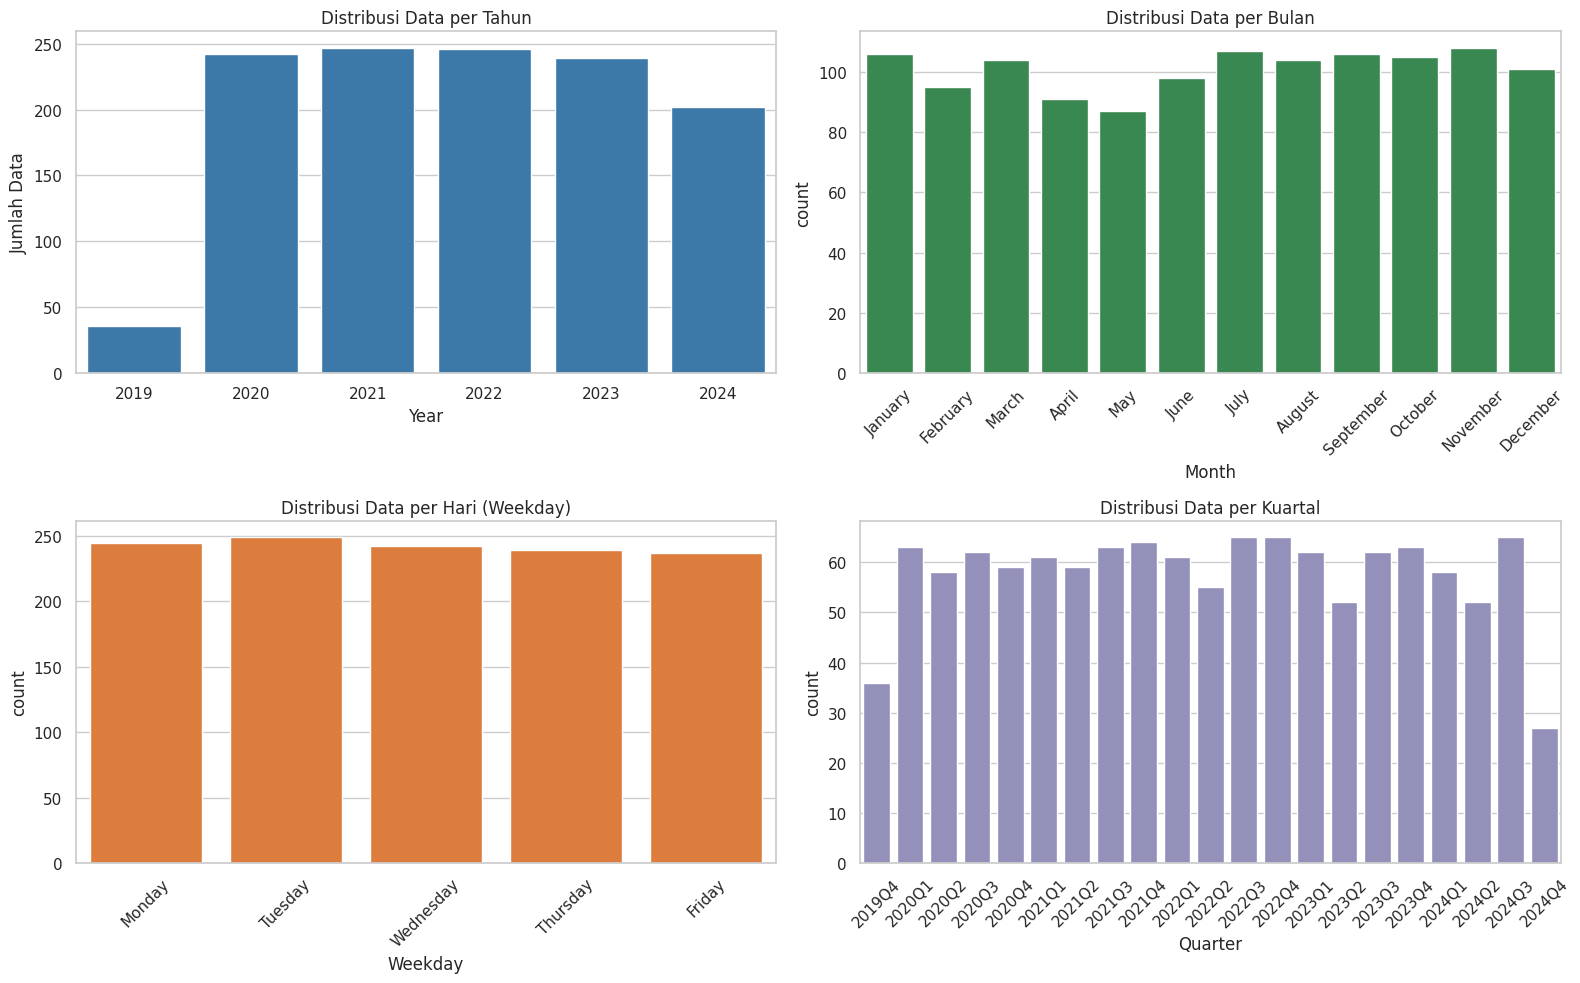

In [ ]:
# Ekstraksi fitur waktu
TLKM['Year'] = TLKM['Date'].dt.year
TLKM['Month'] = TLKM['Date'].dt.month_name()
TLKM['Weekday'] = TLKM['Date'].dt.day_name()
TLKM['Quarter'] = TLKM['Date'].dt.to_period('Q')

plt.figure(figsize=(16, 10))

# Per Tahun – warna biru gradasi
plt.subplot(2, 2, 1)
sns.countplot(x='Year', data=TLKM, color=sns.color_palette("Blues")[4])
plt.title('Distribusi Data per Tahun')
plt.ylabel('Jumlah Data')

# Per Bulan – warna hijau gradasi
plt.subplot(2, 2, 2)
sns.countplot(x='Month', data=TLKM, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], color=sns.color_palette("Greens")[4])
plt.title('Distribusi Data per Bulan')
plt.xticks(rotation=45)

# Per Hari – warna oranye gradasi
plt.subplot(2, 2, 3)
sns.countplot(x='Weekday', data=TLKM, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
], color=sns.color_palette("Oranges")[3])
plt.title('Distribusi Data per Hari (Weekday)')
plt.xticks(rotation=45)

# Per Kuartal – warna ungu gradasi
plt.subplot(2, 2, 4)
sns.countplot(x='Quarter', data=TLKM.sort_values('Date'), color=sns.color_palette("Purples")[3])
plt.title('Distribusi Data per Kuartal')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Insight**:

1. **Distribusi per Tahun**:
   - Data dari tahun **2019** sangat sedikit karena hanya mencakup sebagian tahun.
   - Tahun **2020 hingga 2022** memiliki jumlah data paling lengkap dan seimbang.
   - Data tahun **2024** belum lengkap (hanya sampai sebagian kuartal ke-2 atau ke-3), sehingga jumlah datanya lebih rendah.

2. **Distribusi per Bulan**:
   - Distribusi data per bulan terlihat **cukup merata**, menunjukkan **tidak ada bulan yang secara signifikan kehilangan data**.
   - Ini mengindikasikan bahwa data saham dikumpulkan secara konsisten sepanjang tahun.

3. **Distribusi per Hari (Weekday)**:
   - Hari Senin sampai Jumat memiliki jumlah data yang hampir sama.
   - Hal ini **konsisten dengan jadwal pasar saham** yang hanya buka pada hari kerja (Senin–Jumat), dan **tidak ada data untuk Sabtu & Minggu**.

4. **Distribusi per Kuartal**:
   - Data per kuartal menunjukkan **konsistensi jumlah data tiap kuartal**, terutama dari 2020Q1 hingga 2023Q4.
   - Kuartal awal (2019Q4) dan akhir (2024Q2–Q4) memiliki jumlah data lebih sedikit karena cakupan waktunya tidak penuh.

**Kesimpulan**:

- Distribusi data saham TLKM berdasarkan waktu **sudah cukup merata dan konsisten**, terutama sejak tahun 2020.
- Tidak ditemukan missing period yang signifikan, sehingga dataset ini **siap digunakan untuk analisis time series atau modeling berbasis waktu**.
- Variasi kecil dalam distribusi volume per waktu dapat dijelaskan oleh musim liburan, hari libur pasar, atau awal/akhir tahun.


#### **Visualisasi Tren Harga Open & Close Saham**

Visualisasi yang digunakan adalah **line plot** terhadap waktu, membandingkan harga `Open` dan `Close` untuk melihat **pola pergerakan harga saham dari waktu ke waktu**.

Line plot tren membantu untuk:
- Mengetahui **pergerakan historis harga saham**.
- Melihat **perbedaan antara harga pembukaan dan penutupan** setiap hari.
- Mengidentifikasi pola **naik-turun (volatilitas)** serta potensi **tren jangka panjang**.

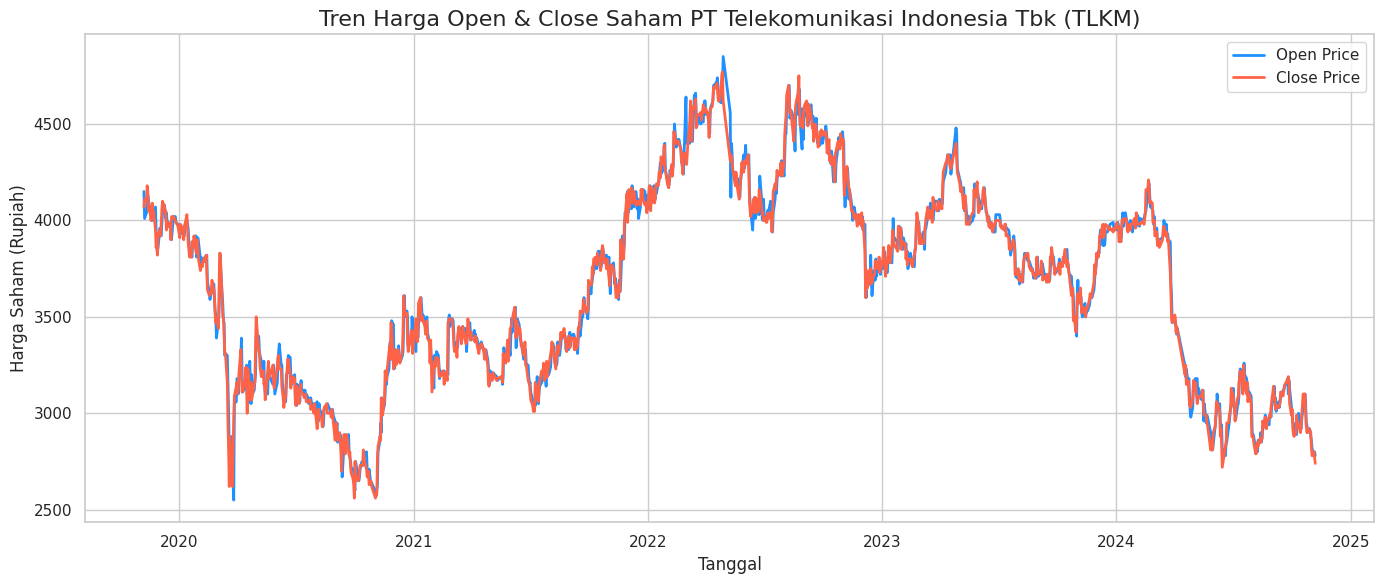

In [ ]:
# ===== 1. Bersihkan nama kolom dari spasi =====
TLKM.columns = TLKM.columns.str.strip()

# ===== 2. Pastikan 'Date' tersedia sebagai kolom, bukan index =====
if 'Date' not in TLKM.columns:
    TLKM.reset_index(inplace=True)

# ===== 3. Konversi 'Date' ke tipe datetime =====
TLKM['Date'] = pd.to_datetime(TLKM['Date'], dayfirst=True, errors='coerce')

# ===== 4. Hapus baris dengan nilai NaT di 'Date' =====
TLKM = TLKM.dropna(subset=['Date'])

# ===== 5. Sortir berdasarkan tanggal (opsional tapi bagus) =====
TLKM = TLKM.sort_values('Date')

# ===== 6. Plot Open & Close =====
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Open', data=TLKM, label='Open Price', color='dodgerblue', linewidth=2)
sns.lineplot(x='Date', y='Close', data=TLKM, label='Close Price', color='tomato', linewidth=2)

plt.title("Tren Harga Open & Close Saham PT Telekomunikasi Indonesia Tbk (TLKM)", fontsize=16)
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham (Rupiah)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Terjadi penurunan tajam harga saham pada awal 2020.
- Tren harga meningkat stabil dari akhir 2020 hingga 2022.
- Mulai tahun 2023, tren cenderung **menurun kembali**.
- Harga `Open` dan `Close` sangat berdekatan, menunjukkan **selisih kecil dalam satu hari perdagangan**.

### **Exploratory Data Analysis - Multivariate Analysis**

Setelah melakukan analisis univariat (satu variabel), tahap selanjutnya adalah **Multivariate Analysis**, yaitu analisis untuk melihat **hubungan antar lebih dari satu variabel** dalam dataset.

Multivariate analysis membantu kita untuk:
- Menemukan korelasi antar fitur numerik.
- Mengidentifikasi pola atau tren antar pasangan variabel.
- Menentukan fitur mana yang saling berkaitan erat (redundan) dan fitur mana yang independen.
- Membantu memilih fitur terbaik untuk modeling atau prediksi.

#### **Visualisasi Pairplot (Scatterplot Matrix)**

Visualisasi yang digunakan adalah **pairplot**, yaitu kumpulan **scatter plot antar fitur numerik**, dengan **diagonal** menunjukkan distribusi masing-masing fitur (dengan KDE).

Pairplot membantu dalam:
- Melihat **hubungan linier** atau non-linier antar fitur.
- Menemukan **klaster atau pola penyebaran** data.
- Mengidentifikasi outlier pada kombinasi fitur tertentu.

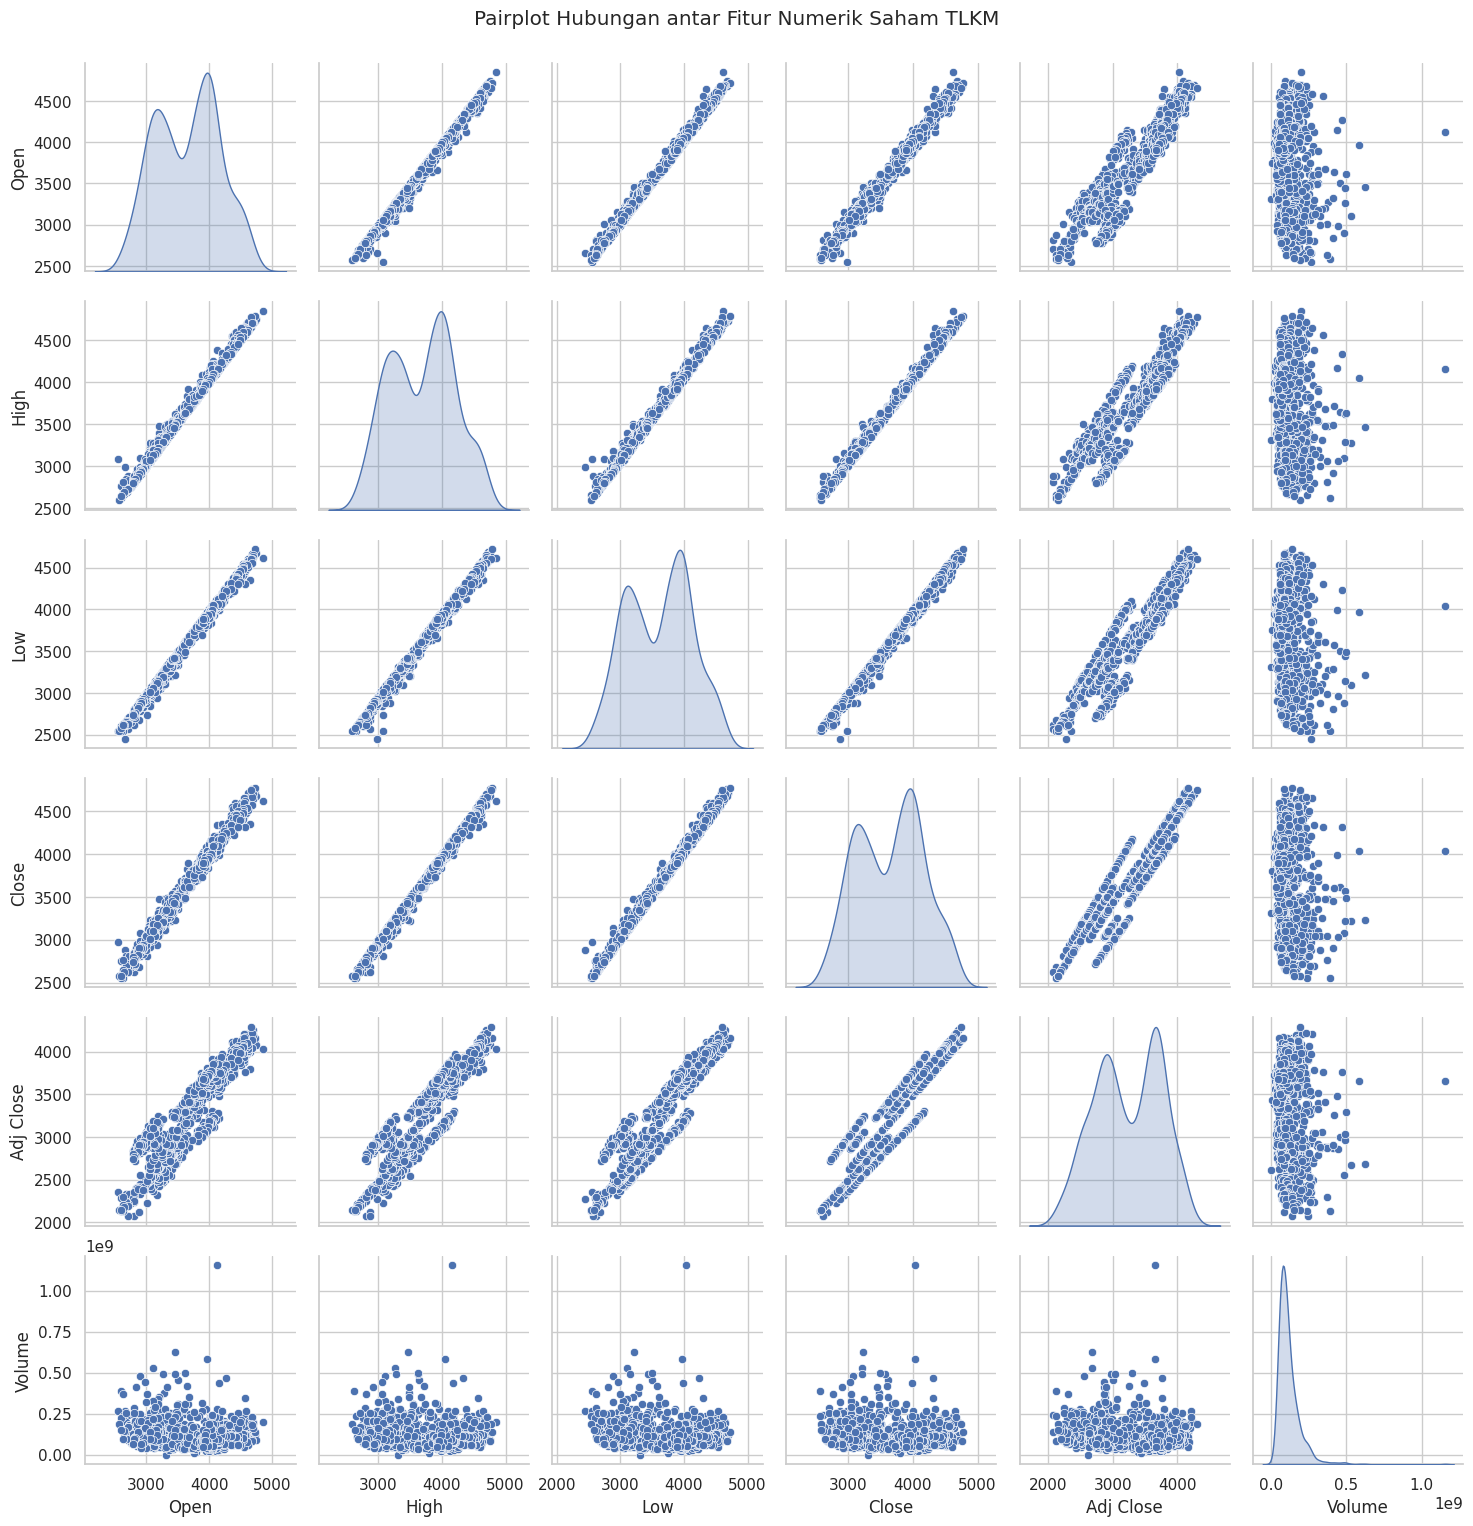

In [ ]:
# Pilih kolom numerik
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Pairplot penuh tanpa corner, pakai KDE di diagonal
sns.pairplot(TLKM[num_cols], diag_kind='kde')

plt.suptitle('Pairplot Hubungan antar Fitur Numerik Saham TLKM', y=1.02)
plt.show()

**Insight**:

1. **Korelasi Tinggi antar Harga (`Open`, `High`, `Low`, `Close`, `Adj Close`)**
   - Terdapat **korelasi linier yang sangat kuat** antara `Open`, `High`, `Low`, `Close`, dan `Adj Close`, terlihat dari scatter plot yang membentuk garis diagonal rapat.
   - Hal ini wajar, karena kelima fitur tersebut merepresentasikan harga pada titik waktu berbeda dalam satu hari dan saling berkaitan.

2. **`Volume` Tidak Berkorelasi Kuat dengan Harga**
   - Tidak tampak pola hubungan yang jelas antara `Volume` dengan fitur harga (`Open`, `Close`, dst).
   - Menunjukkan bahwa **volume perdagangan tidak selalu sejalan dengan fluktuasi harga**, dan perlu dianalisis terpisah.

3. **Distribusi Bimodal**
   - Diagonal histogram untuk beberapa fitur harga menunjukkan pola **bimodal**, konsisten dengan analisis univariat sebelumnya.
   - Ini menunjukkan kemungkinan adanya dua periode harga dominan dalam data.

**Kesimpulan**:

- Sebagian besar fitur harga memiliki **korelasi tinggi**, sehingga dalam modeling dapat dipertimbangkan untuk memilih hanya sebagian dari mereka agar tidak terjadi **multikolinearitas**.
- `Volume` cenderung **independen**, sehingga bisa menjadi fitur tambahan yang menarik dalam model prediktif.
- Pairplot sangat efektif untuk melihat hubungan antar fitur dan mengidentifikasi anomali atau pola distribusi yang menarik.


#### **Visualisasi Heatmap untuk Fitur Numerik**

Visualisasi di atas menunjukkan korelasi antar fitur numerik dalam dataset saham TLKM. Korelasi diukur dalam rentang nilai dari -1 hingga 1, di mana:

- 1 artinya korelasi positif sempurna (kedua variabel naik bersama),

- -1 artinya korelasi negatif sempurna (satu naik, satu turun),

- 0 artinya tidak ada hubungan linear yang kuat.

**Penjelasan Visualisasi**:
- Warna merah tua menunjukkan korelasi positif yang sangat kuat (mendekati 1).

- Warna biru tua menunjukkan korelasi negatif (mendekati -1).

- Angka di setiap sel mewakili nilai korelasi Pearson antar dua fitur.

/tmp/ipython-input-28-4199825059.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  truncated_corr = correlation_matrix.applymap(lambda x: np.floor(x * 100) / 100)
/tmp/ipython-input-28-4199825059.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


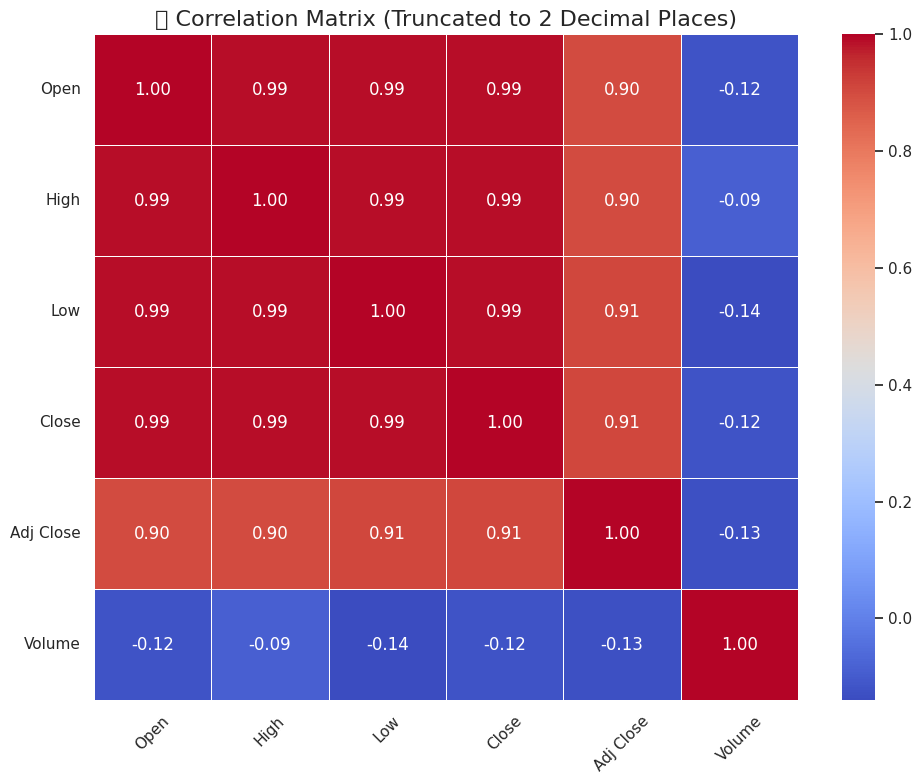

In [ ]:
# Tambahkan Volume_log jika sudah mengganti Volume aslinya
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Hitung korelasi
correlation_matrix = TLKM[numerical_features].corr()

# Truncate (potong) ke 2 desimal TANPA pembulatan
truncated_corr = correlation_matrix.applymap(lambda x: np.floor(x * 100) / 100)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=truncated_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("📊 Correlation Matrix (Truncated to 2 Decimal Places)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**Insight**:
- Open, High, Low, dan Close memiliki korelasi yang sangat tinggi satu sama lain (0,99).

  - pergerakan harga pada satu titik waktu sangat memengaruhi harga pada titik lainnya.

  - Hal ini umum terjadi pada data saham karena harga pembukaan, tertinggi, dan penutupan biasanya bergerak searah.

- Adj Close juga memiliki korelasi tinggi (0.91) terhadap Open, High, Low, dan Close.

  - Ini menunjukkan bahwa harga penutupan yang disesuaikan masih sangat terkait dengan harga aktual.

- Volume_log menunjukkan korelasi negatif lemah terhadap semua fitur harga (sekitar -0.09 sampai -0.13).


---

**Keputusan Fitur dan Target**:

  - Target (label): Close

  - Fitur yang digunakan untuk prediksi: Open, High, Low

In [ ]:
# 1. Transformasi log untuk Volume
TLKM['Volume_log'] = np.log1p(TLKM['Volume'])

# 2. Simpan hasil minimum yang diperlukan ke df_clean
df_clean = TLKM[['Date', 'Open', 'High', 'Low', 'Close_Capped', 'Volume_log']].copy()

print("✅ Data telah disiapkan di df_clean")
print(df_clean.head())


✅ Data telah disiapkan di df_clean
        Date    Open    High     Low  Close_Capped  Volume_log
0 2019-11-07  4150.0  4150.0  3990.0        4070.0   18.646151
1 2019-11-08  4010.0  4120.0  3990.0        4110.0   18.069772
2 2019-11-11  4040.0  4120.0  4040.0        4100.0   17.859961
3 2019-11-12  4050.0  4190.0  4050.0        4180.0   18.295697
4 2019-11-13  4130.0  4170.0  4100.0        4150.0   18.336491


## **3. Data preparation**

Tahap **data preparation** adalah fondasi utama dalam proses machine learning. Tanpa persiapan data yang baik, hasil model tidak akan akurat atau bahkan bisa menyesatkan.  

**Tujuan Tahapan Ini**:
- Menyiapkan data agar dapat digunakan oleh model berbasis neural network seperti LSTM dan GRU.

- Melakukan feature engineering, termasuk ekstraksi fitur waktu.

- Membagi data menjadi data latih (train) dan data uji (test) tanpa shuffle, karena urutan waktu sangat penting dalam masalah time series.

- Melakukan normalisasi menggunakan Min-Max Scaler pada fitur dan target agar berada dalam skala yang seragam.

- Membentuk data menjadi sequence time series untuk menghasilkan pasangan input-target sesuai kebutuhan model.


#### **Feature Engineering - Ekstraksi Fitur Waktu**

- Pada tahap ini Kolom Date di ektrak menjadi tiga fitur waktu  yaitu Year, Month, dan Day
- Ekstraksi waktu dilakukan karena elemen waktu merupakan salah satu faktor kunci dalam pemodelan data deret waktu (time-series).


In [ ]:
# Salin ulang dari df_clean agar data asli tetap aman
df_final = df_clean.copy()

# Tambahkan fitur waktu (tahun, bulan, hari)
df_final['Year'] = df_final['Date'].dt.year
df_final['Month'] = df_final['Date'].dt.month
df_final['Day'] = df_final['Date'].dt.day

# Hapus kolom Date
df_final.drop(columns=['Date'], inplace=True)

# Susun ulang kolom: Year, Month, Day di depan
ordered_columns = ['Year', 'Month', 'Day'] + [col for col in df_final.columns if col not in ['Year', 'Month', 'Day']]
df_final = df_final[ordered_columns]


In [ ]:
print("\n✅ df_final (Data Asli):")
df_final.head()


✅ df_final (Data Asli):


,Year,Month,Day,Open,High,Low,Close_Capped,Volume_log
0,2019,11,7,4150.0,4150.0,3990.0,4070.0,18.646151
1,2019,11,8,4010.0,4120.0,3990.0,4110.0,18.069772
2,2019,11,11,4040.0,4120.0,4040.0,4100.0,17.859961
3,2019,11,12,4050.0,4190.0,4050.0,4180.0,18.295697
4,2019,11,13,4130.0,4170.0,4100.0,4150.0,18.336491


#### **Data Splitting**

Tahapan ini meliputi pemilihan fitur dan target, membagi data train-test berdasarkan waktu, melakukan normalisasi dengan MinMaxScaler, membentuk sequence untuk time series, hingga data siap digunakan oleh model LSTM/GRU.

In [ ]:
# 1. Pilih fitur dan target
fitur_dipakai = ['Open', 'High', 'Low']
target = 'Close_Capped'

X = df_final[fitur_dipakai].values
y = df_final[target].values.reshape(-1, 1)

# 2. Split dulu (berdasarkan waktu, tanpa shuffle)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train_raw, X_test_raw = X[:split_index], X[split_index:]
y_train_raw, y_test_raw = y[:split_index], y[split_index:]

# 3. Normalisasi (fit hanya ke train, transform test)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

y_train_scaled = scaler_y.fit_transform(y_train_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# 4. Fungsi pembentuk sequence time series
def create_sequences(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

# 5. Buat sequence dari data train & test
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# 6. Hasil akhir
print("✅ Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq :", X_test_seq.shape)
print("y_test_seq :", y_test_seq.shape)


✅ Shapes:
X_train_seq: (909, 60, 3)
y_train_seq: (909, 1)
X_test_seq : (183, 60, 3)
y_test_seq : (183, 1)


**Insight**
- X_train_seq (909, 60, 3) → Data input untuk pelatihan: 909 sampel, 60 langkah waktu, 3 fitur (Open, High, Low)

- y_train_seq (909, 1) → Target pelatihan: nilai Close_Capped setelah 60 langkah

- X_test_seq (183, 60, 3) → Data input untuk pengujian dengan struktur sama seperti pelatihan

- y_test_seq (183, 1) → Target pengujian: nilai yang diprediksi setelah window 60 langkah

## **4. Model Deployment**

Tahapan ini bertujuan untuk membangun dan menguji model prediksi harga saham menggunakan dua metode berbasis Recurrent Neural Network, yaitu:

- LSTM (Long Short-Term Memory)
Digunakan karena kemampuannya mengingat informasi jangka panjang dalam data time series.

- GRU (Gated Recurrent Unit)
Merupakan alternatif yang lebih ringan dari LSTM dengan performa yang seringkali sebanding.

### Model LSTM

LSTM adalah model neural network khusus time series yang mampu mengingat pola jangka panjang dan efektif untuk prediksi harga saham karena mempertahankan informasi dari data sebelumnya.

- Model LSTM dilatih dengan 64 unit, dropout 0.2, dan output 1 neuron untuk prediksi.
- Optimizer Adam (lr=0.0005) dan loss function MSE digunakan.
Training dilakukan hingga 100 epoch dengan batch size 16 dan validasi 10%.
EarlyStopping digunakan untuk menghentikan training saat val_loss stagnan 5 epoch.

In [ ]:
# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Arsitektur Model LSTM
model_lstm= Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile
optimizer = Adam(learning_rate=0.0005)
model_lstm.compile(optimizer=optimizer, loss='mse')

# Train
history_lstm = model_lstm.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0816 - val_loss: 0.0026
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0085 - val_loss: 0.0016
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0091 - val_loss: 0.0012
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0067 - val_loss: 0.0012
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0064 - val_loss: 9.7646e-04
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - val_loss: 9.7048e-04
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - val_loss: 9.9062e-04
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - val_loss: 9.9112e-04
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - val_loss: 0.0014


In [ ]:
model_lstm.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,421 (204.77 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,948 (136.52 KB)

**Insight**
- LSTM Layer: Terdiri dari 64 unit dengan total 17.408 parameter, menjadikan LSTM lebih kompleks dari GRU karena 4 gerbang internal (forget, input, candidate, output).
- Dropout Layer: Tidak memiliki parameter, digunakan untuk mengurangi overfitting, dan meneruskan 64 output dari layer sebelumnya dengan beberapa unit dinonaktifkan (drop) secara acak saat training.
- Dense Layer: Menerima input dari 64 unit sebelumnya dan menghasilkan 1 output prediksi dengan total 65 parameter (64 bobot + 1 bias).

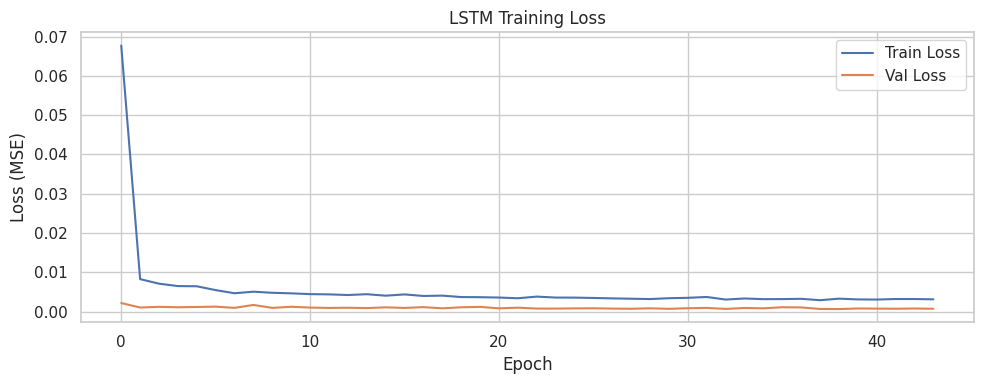

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:**
- Grafik menunjukkan penurunan training loss dan validation loss secara bertahap, menandakan proses pelatihan berjalan dengan baik.
- Namun, jarak antara training loss dan validation loss mulai melebar di akhir pelatihan, yang mengindikasikan potensi overfitting ringan.
- Model LSTM cenderung terlalu menyesuaikan dengan data pelatihan dan kurang fleksibel saat menghadapi data baru (validasi).
- Ini dapat menjelaskan mengapa prediksi LSTM terlihat terlalu datar dan tidak mengikuti fluktuasi harga yang tajam.

### Model GRU

GRU (Gated Recurrent Unit) adalah varian dari RNN yang lebih sederhana dibanding LSTM namun tetap efektif dalam menangkap ketergantungan jangka panjang pada data time series seperti harga saham.

- Model GRU menggunakan 64 unit dengan dropout 0.2 dan 1 neuron output untuk prediksi.

- Optimizer Adam (lr=0.0005) dan loss function MSE digunakan.

- Model dilatih selama 100 epoch dengan batch size 16 dan validasi 10%.

- EarlyStopping diterapkan untuk menghentikan pelatihan saat val_loss tidak membaik selama 5 epoch.

In [ ]:
# --- EarlyStopping untuk menghindari overfitting ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# --- Arsitektur Model GRU ---
model_gru = Sequential([
    GRU(64, return_sequences=False, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# --- Compile Model ---
model_gru.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# --- Train Model ---
history_gru = model_gru.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0704 - val_loss: 0.0012
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0085 - val_loss: 7.8780e-04
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0086 - val_loss: 9.5575e-04
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0073 - val_loss: 8.4246e-04
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0054 - val_loss: 6.6834e-04
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0048 - val_loss: 6.7303e-04
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0055 - val_loss: 6.3009e-04
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0036 - val_loss: 6.2854e-04
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 6.8293e-04
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0035 - val_loss: 5.2893e-04
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0038 - val_loss: 5.5796e-04
Epoch 12/100
52/52 ━━━━━

In [ ]:
model_gru.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_44 (GRU)                    │ (None, 64)             │        13,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,941 (156.02 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,628 (104.02 KB)

**Insight**
- GRU Layer: Terdiri dari 64 unit dengan total 13.248 parameter, lebih ringan dari LSTM karena hanya memiliki 3 gerbang internal (reset, update).
- Dropout Layer: Tidak memiliki parameter, digunakan untuk mengurangi overfitting, dan meneruskan 64 output dari layer sebelumnya dengan beberapa unit dinonaktifkan secara acak saat training.
- Dense Layer: Menerima input dari 64 unit sebelumnya dan menghasilkan 1 output prediksi dengan total 65 parameter (64 bobot + 1 bias).

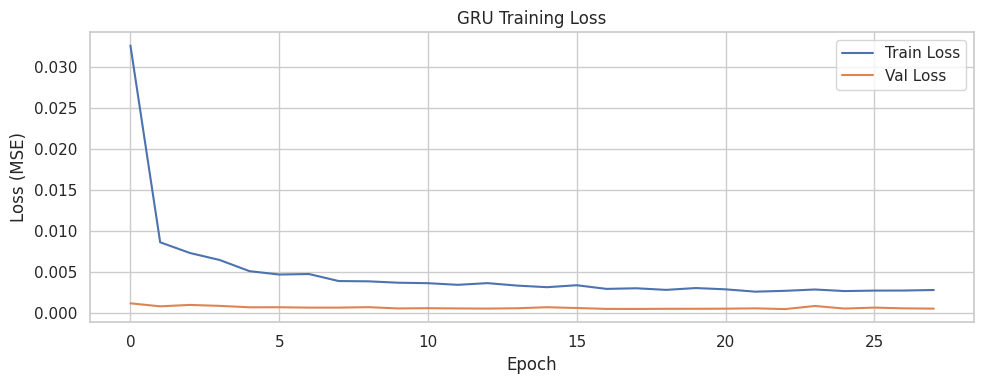

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:**
- Baik training loss maupun validation loss menurun secara konsisten dan beriringan, menandakan model GRU belajar dengan stabil dan tidak overfitting.
- Perbedaan antara training dan validation loss sangat kecil, menunjukkan generalisasi model yang baik terhadap data baru.
- GRU lebih cepat konvergen dibanding LSTM dan mempertahankan akurasi yang lebih tinggi di data validasi.
- Hal ini memperkuat temuan bahwa GRU lebih efektif untuk prediksi jangka pendek pada data harga saham TLKM.

## **5. Evaluation Model**

Tahapan evaluasi model bertujuan untuk mengukur seberapa baik performa model dalam memprediksi harga saham. Pada tahap ini, digunakan tiga metrik evaluasi utama:

- MAE (Mean Absolute Error): Mengukur rata-rata selisih absolut antara nilai aktual dan prediksi. Semakin kecil nilai MAE, semakin akurat model.

- RMSE (Root Mean Squared Error): Mengukur akar dari rata-rata kuadrat selisih antara nilai aktual dan prediksi. RMSE memberikan penalti lebih besar terhadap kesalahan besar.

- MAPE (Mean Absolute Percentage Error): Mengukur persentase kesalahan rata-rata antara nilai aktual dan prediksi, berguna untuk memahami seberapa besar kesalahan dalam konteks relatif.

### Evaluasi Model LTSM & GRU (Data Normalisasi) - Data Uji

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
LSTM - MAE: 0.0384, RMSE: 0.0469
GRU  - MAE: 0.0245, RMSE: 0.0313


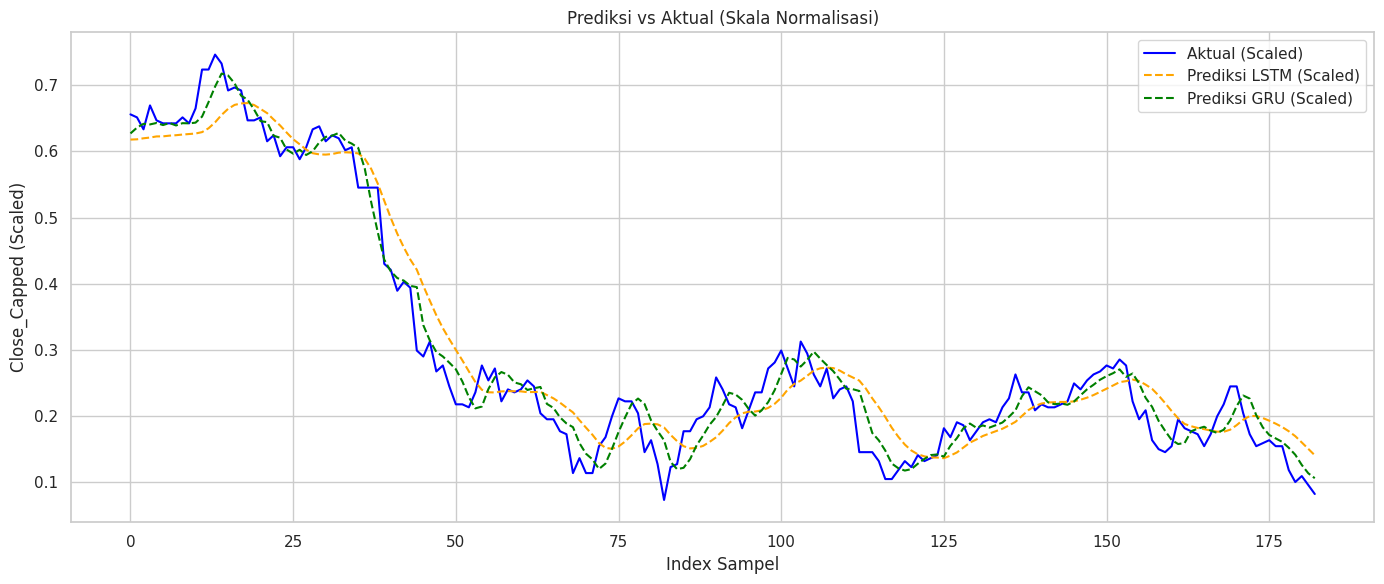

In [ ]:
# --- 1. Prediksi ---
y_pred_lstm = model_lstm.predict(X_test_seq).flatten()
y_pred_gru = model_gru.predict(X_test_seq).flatten()

# --- 2. Gunakan y_test_seq yang sudah di-windowing
y_test_scaled = y_test_seq.flatten()

# --- 3. Evaluasi: skala normalisasi ---
mae_lstm = mean_absolute_error(y_test_scaled, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_scaled, y_pred_lstm))

mae_gru = mean_absolute_error(y_test_scaled, y_pred_gru)
rmse_gru = np.sqrt(mean_squared_error(y_test_scaled, y_pred_gru))

# --- 4. Cetak hasil ---
print(f"LSTM - MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}")
print(f"GRU  - MAE: {mae_gru:.4f}, RMSE: {rmse_gru:.4f}")


plt.figure(figsize=(14,6))
plt.plot(y_test_scaled, label='Aktual (Scaled)', color='blue')
plt.plot(y_pred_lstm, label='Prediksi LSTM (Scaled)', linestyle='--', color='orange')
plt.plot(y_pred_gru, label='Prediksi GRU (Scaled)', linestyle='--', color='green')
plt.title('Prediksi vs Aktual (Skala Normalisasi)')
plt.xlabel('Index Sampel')
plt.ylabel('Close_Capped (Scaled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:**
- Garis prediksi GRU tampak lebih mengikuti pola harga aktual dibandingkan LSTM.
- LSTM menghasilkan garis prediksi yang lebih datar, cenderung mengabaikan fluktuasi harga yang tajam.
- GRU lebih adaptif terhadap tren penurunan pada hari ke-6 dan 7, meskipun belum sepenuhnya tepat.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
LSTM - MAE: 84.76 Rupiah, RMSE: 103.71 Rupiah, MAPE: 2.69%
GRU  - MAE: 54.18 Rupiah, RMSE: 69.13 Rupiah, MAPE: 1.73%


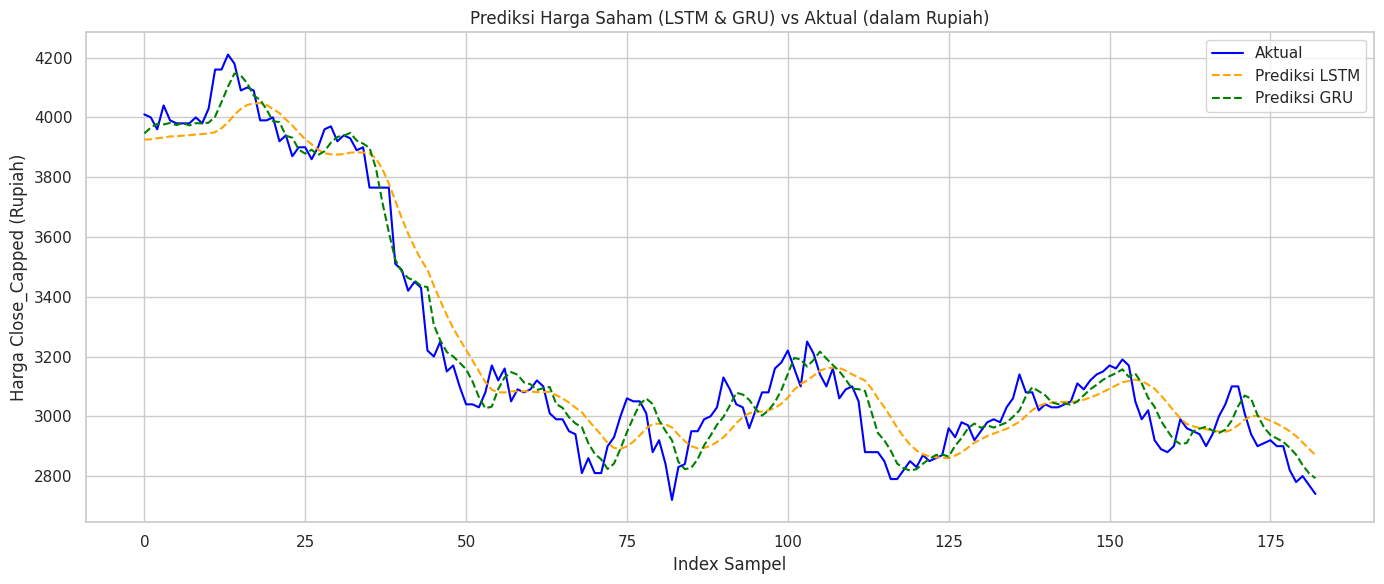

In [ ]:
# --- Prediksi ---
y_pred_lstm = model_lstm.predict(X_test_seq).flatten()
y_pred_gru = model_gru.predict(X_test_seq).flatten()

# --- Invers transform ke skala asli (dalam Rupiah) ---
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()
y_pred_lstm_inv = scaler_y.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()
y_pred_gru_inv = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1)).flatten()

# --- Evaluasi ---
mae_lstm = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm_inv))
mape_lstm = np.mean(np.abs((y_test_inv - y_pred_lstm_inv) / y_test_inv)) * 100

mae_gru = mean_absolute_error(y_test_inv, y_pred_gru_inv)
rmse_gru = np.sqrt(mean_squared_error(y_test_inv, y_pred_gru_inv))
mape_gru = np.mean(np.abs((y_test_inv - y_pred_gru_inv) / y_test_inv)) * 100

# --- Print ---
print(f"LSTM - MAE: {mae_lstm:.2f} Rupiah, RMSE: {rmse_lstm:.2f} Rupiah, MAPE: {mape_lstm:.2f}%")
print(f"GRU  - MAE: {mae_gru:.2f} Rupiah, RMSE: {rmse_gru:.2f} Rupiah, MAPE: {mape_gru:.2f}%")

# --- Visualisasi ---
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label='Aktual', color='blue')
plt.plot(y_pred_lstm_inv, label='Prediksi LSTM', linestyle='--', color='orange')
plt.plot(y_pred_gru_inv, label='Prediksi GRU', linestyle='--', color='green')
plt.title('Prediksi Harga Saham (LSTM & GRU) vs Aktual (dalam Rupiah)')
plt.xlabel('Index Sampel')
plt.ylabel('Harga Close_Capped (Rupiah)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Grafik ini menguatkan bahwa GRU lebih akurat dalam mengikuti arah tren harga aktual.
- LSTM memiliki jeda respons terhadap perubahan mendadak, terutama saat harga mengalami penurunan signifikan.
- Kedua model cenderung memiliki prediksi yang mendekati rata-rata, tetapi GRU lebih fleksibel dalam mengikuti tren aktual.

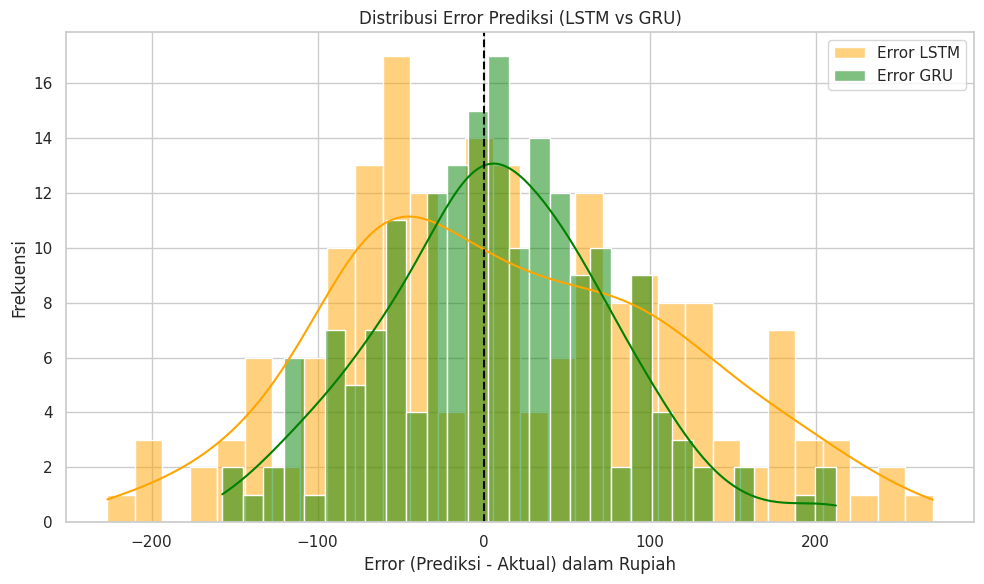

In [ ]:
# Hitung error (selisih prediksi dan aktual)
error_lstm = (y_pred_lstm_inv.flatten() - y_test_inv.flatten())
error_gru = (y_pred_gru_inv.flatten() - y_test_inv.flatten())

# Plot distribusi error
plt.figure(figsize=(10, 6))
sns.histplot(error_lstm, kde=True, color='orange', label='Error LSTM', bins=30)
sns.histplot(error_gru, kde=True, color='green', label='Error GRU', bins=30)
plt.axvline(0, color='black', linestyle='--')
plt.title('Distribusi Error Prediksi (LSTM vs GRU)')
plt.xlabel('Error (Prediksi - Aktual) dalam Rupiah')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:**
- Distribusi error menunjukkan sebagian besar nilai error berada dekat dengan nol, menandakan prediksi cukup akurat secara umum.
- GRU menghasilkan error yang lebih sempit dan simetris dibandingkan LSTM, mengindikasikan konsistensi model.
- Tidak ada error ekstrem yang dominan, yang berarti model mampu menahan dampak outlier dengan baik.

## **Forecasting - Prediksi 7 hari ke depan (Data Asli)**

- Tahapan ini bertujuan untuk menggunakan model terlatih (LSTM atau GRU) dalam memprediksi harga saham selama 7 hari ke depan berdasarkan data historis terbaru.
- Model menerima sequence terakhir dari data asli (bukan data uji) sebagai input, lalu melakukan prediksi satu per satu secara autoregressive (menggunakan hasil prediksi sebelumnya sebagai input untuk prediksi berikutnya).
- Hasil akhir berupa 7 nilai prediksi harga saham yang dapat divisualisasikan bersama data historis sebagai gambaran tren ke depan.

In [ ]:
def forecast_days(model, last_sequence, days, scaler_X, scaler_y):
    forecast = []
    input_seq = last_sequence.copy()  # (60, 3)

    for _ in range(days):
        # Prediksi 1 hari ke depan
        pred_input = np.expand_dims(input_seq, axis=0)  # (1, 60, 3)
        pred_scaled = model.predict(pred_input, verbose=0)[0][0]
        forecast.append(pred_scaled)

        # Gunakan prediksi sebagai proxy semua fitur (misalnya prediksi Close sebagai Open/High/Low juga)
        predicted_features = np.array([pred_scaled] * input_seq.shape[1])  # misal: [pred, pred, pred] untuk 3 fitur

        # Tambahkan ke sequence (geser dan tambah yang baru)
        input_seq = np.vstack([input_seq[1:], predicted_features])

    # Invers transform hasil prediksi ke skala asli
    forecast_prices = scaler_y.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()
    return forecast_prices


In [ ]:
# Ambil 60 hari terakhir dari data training (X_scaled)
last_sequence = X_scaled[-60:]  # shape: (60, 3)

# Prediksi ke depan dan bulatkan ke 2 angka di belakang koma
forecast_7d_gru = np.round(forecast_days(model_gru, last_sequence, 7, scaler_X, scaler_y), 2)
forecast_7d_lstm = np.round(forecast_days(model_lstm, last_sequence, 7, scaler_X, scaler_y), 2)


### GRU

/tmp/ipython-input-475-496330855.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


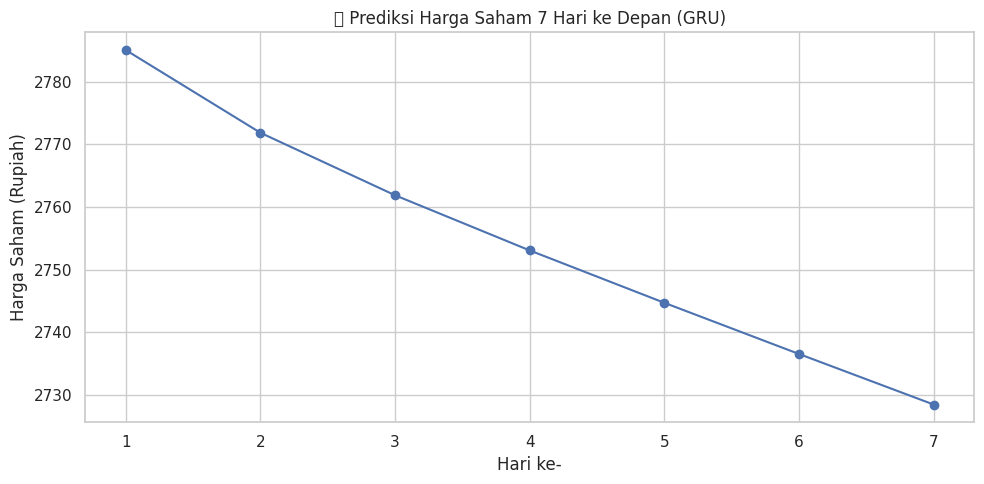

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(forecast_7d_gru)+1), forecast_7d_gru, marker='o')
plt.title('📈 Prediksi Harga Saham 7 Hari ke Depan (GRU)')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Saham (Rupiah)')
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM

/tmp/ipython-input-476-3876676620.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


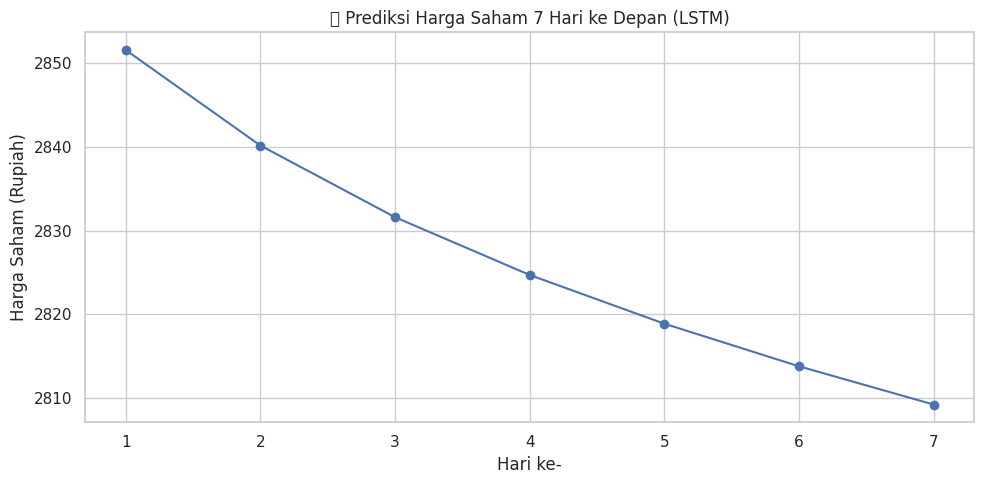

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(forecast_7d_lstm)+1), forecast_7d_lstm, marker='o')
plt.title('📈 Prediksi Harga Saham 7 Hari ke Depan (LSTM)')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Saham (Rupiah)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
harga_aktual_7d = df_final['Close_Capped'].values[-7:]

df_forecast_7d = pd.DataFrame({
    'Hari ke-': [f'Hari ke-{i+1}' for i in range(7)],
    'Harga Aktual': harga_aktual_7d,
    'Prediksi GRU': forecast_7d_gru,
    'Prediksi LSTM': forecast_7d_lstm
})

print("📊 Perbandingan (Aktual 7 hari terakhir vs Forecasting 7 hari ke depan):")
print(df_forecast_7d.to_string(index=False, formatters={
    'Harga Aktual': lambda x: f'{x:.1f}',
    'Prediksi GRU': lambda x: f'{x:.1f}',
    'Prediksi LSTM': lambda x: f'{x:.1f}'
}))



📊 Perbandingan (Aktual 7 hari terakhir vs Forecasting 7 hari ke depan):
 Hari ke- Harga Aktual Prediksi GRU Prediksi LSTM
Hari ke-1       2900.0       2785.0        2851.5
Hari ke-2       2900.0       2771.8        2840.1
Hari ke-3       2820.0       2761.9        2831.6
Hari ke-4       2780.0       2753.1        2824.7
Hari ke-5       2800.0       2744.7        2818.9
Hari ke-6       2770.0       2736.5        2813.8
Hari ke-7       2740.0       2728.4        2809.3


**Insight:**

Baik model LSTM maupun GRU berhasil mengenali dan mengikuti pola tren penurunan harga saham Telkom selama 7 hari ke depan. Meskipun terdapat selisih nilai absolut dibandingkan harga aktual, arah pergerakan harga yang diprediksi kedua model sejalan dengan kenyataan — yaitu penurunan bertahap dari hari ke hari.
- Model tidak hanya menghafal data historis, tapi mampu menangkap pola tren menurun secara konsisten.
- Model GRU menghasilkan prediksi yang lebih tajam dan stabil, sedangkan LSTM memberikan hasil yang lebih moderat namun tetap mengikuti arah yang sama.
- Hal ini menunjukkan bahwa kedua model cukup andal dalam memahami pola pergerakan harga, yang merupakan aspek penting dalam forecasting saham berbasis tren.

## **7. Simpan Model**

In [ ]:
# Simpan model LSTM
model_lstm.save('model_lstm.h5')

# Simpan model GRU
model_gru.save('model_gru.h5')

# Simpan scaler target (scaler_y)
import joblib
joblib.dump(scaler_y, 'scaler_y.pkl')


['scaler_y.pkl']

## **8. Conclusion**

- GRU menunjukkan performa lebih baik dibandingkan LSTM berdasarkan nilai MAE, RMSE, dan MAPE.
- Nilai MAPE < 10% pada kedua model menunjukkan bahwa model memiliki tingkat akurasi yang sangat baik dalam memprediksi harga saham TLKM.
- Secara keseluruhan, model GRU memberikan hasil yang lebih stabil dan presisi, cocok untuk digunakan dalam forecasting jangka pendek.
- Prediksi untuk 7 hari ke depan menunjukkan pola penurunan bertahap yang berhasil ditangkap dengan baik oleh model LSTM dan GRU, dengan GRU memberikan hasil yang lebih stabil dan akurat.

